![alt text](1000x-1.jpg)

# PROJECT "Итоговый проект 1 года обучения (2024 год)".

### Леонтьев П.Н. (поток DSPR-155)

## Оглавление <a id="item-zero"></a>


- [**1. Проблема**](#item-one)
   * [1.1. Проблема](#item-one-one)
   * [1.2. Задачи проекта](#item-one-two)
   * [1.3. Цели проекта](item-one-three)
- [**2. Сбор данных**](#item-two)
   * [2.1. Импорт библиотек, методов и функций](#item-two-one)
   * [2.2. Загружаем данные](#item-two-two)
   * [2.3. Первичный анализ](#item-two-three) 
- [**3. Разведывательный анализ данных**](#item-three)
   * [**3.1. Предобработка, очистка и анализ данных акции**](#item-three-one)
      * [3.1.1. Предобработка, очистка и анализ данных акции Тесла](#item-three-one-one)
      * [3.1.2. Обработка, очистка и анализ данных акции Аэрофлот](#item-three-one-two)
      * [3.1.3. Предобработка, очистка и анализ данных акций компании Аэрофлот за месяц](#item-three-one-tree)
      * [3.1.4. Обработка целевого признака **CLOSE**](#item-three-one-four)
   * [**3.2 Проектирование признаков**](#item-three-two)
      * [3.2.1. Создание признаков из существующего набора данных](#item-three-two-one)
         * [3.2.1.1. Разбор даты и времени](#item-three-two-one-one)
         * [3.2.1.2. Разбор числовых признаков](#item-three-two-one-two)
         * [3.2.1.3. Разбор текста](#item-three-two-one-three)
      * [3.2.2. Создание признаков с помощью внешних источников](#item-three-two-two)
   * [**3.3. Отбор признаков**](#item-three-three)
   * [**3.4. Вычисление процентного изменения цены со временем и выполнение агрегированных расчетов в пределах скользящего временного окна**](#item-three-four)
      * [**3.4.1. Вычисление процентного изменения цены со временем**](#item-three-four-one)
      * [**3.4.2. Вычисление скользящего окна**](#item-three-four-two)
      * [**3.4.3. Многомерные временные ряды**](#item-three-four-three)
- [**4. Моделирование**](#item-four)
   * [**4.1. Прогнозирование индекса московской биржи, построение моделей **](#item-four-one)
      * [4.1.1. Модель прогнозирования скользящего среднего](#item-four-one-one)
      * [4.1.2. LinearRegression() = Baseline model](#item-four-one-two)
      * [4.1.3. K-Nearest Neighbors model](#item-four-one-three)
      * [4.1.4. ARIMA model](#item-four-one-four)
      * [4.1.5. Facebook Prophet model](#item-four-one-five)
      * [4.1.6. Long Short Term Memory (LSTM) model](#item-four-one-six)
      * [4.1.7. Работа с наилучшими моделями на данных акций компании Аэрофлот](#item-four-one-seven)  
- [**5. Выводы**](#item-five)   

## 1. Проблема <a id="item-one"></a>

### 1.1. Проблема <a id="item-one-one"></a>

В крупном инвестиционном подразделении банка существует проблема - специалисты банка тратят катострофически много времени на техничсеикй анализ стоимости акций, что влияет на скорость и качество принятия решения на покупку или продажу того или иного эмитента, который не соответствцет уровню конкурентов. Это, в свою очередь, сказывается на финансовых показателях банка в целом.

[Оглавление ⬆️](#item-zero)

### 1.2. Задачи проекта <a id="item-one-two"></a>

**Бизнес-задача:** разработать сервис, который позволил бы обойти конкурентов по скорости и качеству совершения сделок.

**Техническая задача (как для специалиста в Data Science):** разработать модель для прогнозирования тенденций фондового рынка. Построим простую классификационную модель, которая предсказывает, будет ли завтра цена акции выше, ниже или такой же, как сегодня, на основе истории предложений.

[Оглавление ⬆️](#item-zero)

### 1.3. Цели проекта <a id="item-one-three"></a>

1. *Провести первичную обработку данных* - необходимо обработать пропуски и выбросы в данных для дальнейшей работы с ними;
   
2. *Провести разведывательный анализ данных (EDA)* - необходимо исследовать данные, определить первые закономерности и выдвинуть гипотезы;
   
3. *Выполнить отбор и преобразование признаков* - необходимо перекодировать и преобразовать признаки для решения задачи регрессии;
   
4. *При необходимости спроектировать новые признаки* с помощью Feature Engineering и выявить наиболее значимые при построении модели;
   
5. *Исследовать предоставленные данные* и выявить закономерности;
   
6. *Построить несколько моделей* и выбрать из них наилучшую по определенной метрике;
   
7. *Построить предсказания* - определить алгоритм для построения модели с более качественными предсказаниями, доработать предсказания и прогнозы.

[Оглавление ⬆️](#item-zero)

## 2. Сбор данных <a id="item-two"></a>

### 2.1. Импорт библиотек, методов и функций <a id="item-two-one"></a>


In [30]:
import numpy as np # библиотека для научных вычислений в python 
import pandas as pd # работа с данными
import requests # модуль для парсинга
import datetime # модуль для работы с датой и временем в python
import pathlib
import apimoex # модуль для работы с данными фондового рынка московской биржи
import yfinance as yf
import pandas_datareader.data as pdr
from datetime import date, timedelta
from time import sleep # модуль для задержки выполнения кода
import datetime as dt # модуль для работы с датой и временем в python

# библиотека scipy - библиотека для научных вычислений на python
from scipy.stats import normaltest # тест на проверку выборки на отличие от нормального распределения
import statsmodels.api as sm # библиотека для статистических моделей
import scipy.stats as stats # библиотека для статистических моделей
from statsmodels.tsa.api import SimpleExpSmoothing
import category_encoders as ce # библиотеки для кодирования данных
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt # комплексная библиотека для создания статической, анимированной и интерактивной визуализации на python
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import pmdarima as pm
# включение режима отображения графиков в Jupyter Notebook 
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True 
import seaborn as sns # библиотека визуализации данных python, основанная на matplotlib / python data visualization library based on matplotlib
from statsmodels.graphics.tsaplots import plot_acf
import plotly.express as px # python библиотека для фомирования интерактивных, высококачественных графиков и визуализации данных
import plotly.graph_objs as go # 
from plotly.subplots import make_subplots # 
from pmdarima import auto_arima
from math import floor,ceil,sqrt
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
# библиотека sklearn - python библиотека для машинного обучения построеная на библиотеке scipy
from sklearn.metrics import mean_absolute_error # метрика средняя абсолютная ошибка
from sklearn.metrics import mean_squared_error # метрика средняя квадратичная ошибка
from sklearn.metrics import mean_absolute_percentage_error # метрика средняя абсолютная процентная ошибка

from sklearn.preprocessing import MinMaxScaler # алгоритм стандартизации данных
from sklearn.preprocessing import StandardScaler # алгоритм стандартизации данных
from sklearn.preprocessing import PolynomialFeatures # алгоритм для создания полиномиальных признаков

from sklearn.model_selection import GridSearchCV # алгоритм для подбора гипер-праметров в моделях машинного обучения
from sklearn.model_selection import RandomizedSearchCV # алгоритм для подбора гипер-праметров в моделях машинного обучения
from sklearn.model_selection import train_test_split # модуль для разделения данных на тренировочную и тестовую (валидационную) выборки
from sklearn.model_selection import cross_validate #кросс-валидация данных
from statsmodels.tsa.arima.model import ARIMA
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression, f_classif # алгоритм для выбора признаков с наивысшими оценками в модели машинного обучения на основе статистических тестов / f-regression одномерный тест линейной регрессии  

from sklearn.linear_model import LinearRegression # алгоритм линейной регрессии
from sklearn.linear_model import ElasticNet # алгоритм линейной регрессии с L1- и L2-регуляризацией
from sklearn.tree import DecisionTreeRegressor # алгоритм дерева решений
from sklearn.ensemble import RandomForestRegressor # алгоритм случайный лес для задач регрессии
from sklearn.ensemble import ExtraTreesRegressor # алгоритм случайный лес для задач регрессии
from sklearn.ensemble import GradientBoostingRegressor # алгоритм градиентного бустинга для задач регрессии
from sklearn.ensemble import StackingRegressor # алгоритм стекинга

from sklearn.pipeline import Pipeline # алгоритм для создания цепочек алгоритмов

# библиотека для автоматического подбора гиперпароаметров моделей машинного обучения
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # отключаем вывод промежуточных итогов вычислений

# библиотека для автоматического подбора гиперпароаметров моделей машинного обучения
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials # оптимизация гиперпараметров / hyperparameter optimization

# библиотека для сохранения / загрузки моделей
from joblib import dump, load

# устанавливаем цвета
from colorama import Fore, Back, Style

from IPython.display import display, HTML # для отображения HTML

# отключаем предупреждения
import warnings 
warnings.filterwarnings("ignore")

# увеличиваем количество отображаемых столбцов и строк
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_colwidth", 5000)

In [2]:
# фиксируем RANDOM_SEED, для воспроизводимости кода.
RANDOM_SEED = 369

In [3]:
# фиксируем версии установленных пакетов
!pip freeze > requrements.txt

[Оглавление ⬆️](#item-zero)

### 2.2. Загружаем данные <a id="item-two-two"></a>

Сбор данных в рамках реализации данного проекта был реализован путем решения следующих вариантов:
- написан код парсер, который скачивает данные с сайта московской биржи;
- путем модуля python yfinance;
- ну и третий вариант pdr.get_data_stooq.

In [16]:
# загружаем данные в dataframe, воспльзуемся последним
#tkr = yf.Ticker('BABA')
#hist = tkr.history(period="10y")
#hist.to_csv("data_baba.csv")
#data = pd.read_csv("data_baba.csv", sep=",")
#data.head()

end = date.today()
start = end - timedelta(days=7300)
index_data = pdr.get_data_stooq('^SPX', start, end)
index_data_2 = pdr.get_data_stooq('^MOEX', start, end)
index_data_3 = pdr.get_data_stooq('^RTS', start, end)
index_data_2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-08,2788.12,2799.16,2774.84,2785.62,NaN
2024-10-07,2808.01,2816.88,2779.38,2794.77,NaN
2024-10-04,2799.95,2818.05,2789.93,2802.23,NaN
2024-10-03,2767.51,2790.89,2740.00,2782.40,NaN
2024-10-02,2825.72,2838.76,2767.93,2771.87,NaN


In [17]:
# записываем данные
index_data_2.to_csv("data_moex.csv")

In [18]:
# загружаем данные
index_data_2 = pd.read_csv("data_moex.csv", sep=",")

[Оглавление ⬆️](#item-zero)

### 2.3. Первичный анализ <a id="item-two-three"></a>

In [19]:
# выводим информацию о размерности и табличной структуре данных (голова - хвост)
print("Размер данных: {}".format(index_data_2.shape))
display(index_data_2.head(3))
display(index_data_2.tail(1))

Размер данных: (4970, 6)


,Date,Open,High,Low,Close,Volume
0,2024-10-08,2788.12,2799.16,2774.84,2785.62,NaN
1,2024-10-07,2808.01,2816.88,2779.38,2794.77,NaN
2,2024-10-04,2799.95,2818.05,2789.93,2802.23,NaN


,Date,Open,High,Low,Close,Volume
4969,2004-10-14,634.54,643.25,627.91,636.11,0.0


Данные относятся к периоду с октября 2004 по октябрь 2024 года.

In [20]:
index_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4970 non-null   object 
 1   Open    4970 non-null   float64
 2   High    4970 non-null   float64
 3   Low     4970 non-null   float64
 4   Close   4970 non-null   float64
 5   Volume  4895 non-null   float64
dtypes: float64(5), object(1)
memory usage: 233.1+ KB


1. Dataset содержит 4970 наблюдений и имеет 6 признаков;
2. Данные представлены следующими типами: object - 1 признак;
3. Пропуски данных согласно метода info() присутствуют в 14 признаках;
4. Наименования признаков следующие:
      * Date — признак описывающий время и дату фиксирования значения индекса;
      * Open - признак указывающий на цену открытия;
      * High - признак указывающий на цену максимальную в течение торговой сессии;
      * Low - признак указывающий на цену минимальную;
      * Close - признак указывающий на цену закрытия (целевая переменная);
      * Volume - признак описывающий объемы торгов в течение торговой сессии.
5. Все данные с учетом приведенных ресурсов представлены в достаточно высоком качестве и количестве и практически не требуют предварительной обработки.

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # чтобы были читаемы вещественные числа
index_data_2.describe()

,Open,High,Low,Close,Volume
count,4970.000,4970.000,4970.000,4970.000,4895.000
mean,1938.895,1955.168,1920.772,1938.802,20171676234.046
std,795.766,797.180,792.203,794.892,51252218625.453
min,495.240,509.820,483.550,495.240,0.000
25%,1421.320,1435.940,1406.225,1421.690,0.000
50%,1716.590,1730.865,1700.275,1716.755,0.000
75%,2400.818,2419.407,2377.363,2401.055,20659926132.500
max,4284.910,4292.680,4259.130,4287.520,705654668793.000


In [22]:
for i in index_data_2.columns:
    print(i)
    print(index_data_2[i].unique())

Date
['2024-10-08' '2024-10-07' '2024-10-04' ... '2004-10-18' '2004-10-15'
 '2004-10-14']
Open
[2788.12 2808.01 2799.95 ...  638.71  636.11  634.54]
High
[2799.16 2816.88 2818.05 ...  641.11  636.11  643.25]
Low
[2774.84 2779.38 2789.93 ...  634.27  622.36  627.91]
Close
[2785.62 2794.77 2802.23 ...  638.71  629.29  636.11]
Volume
[           nan 1.71145416e+11 1.41968627e+11 ... 4.21226449e+10
 2.33495613e+10 4.18863877e+10]


In [23]:
# Проверка на пропущенные значения и дубликаты
index_data_2.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume    75
dtype: int64

In [24]:
# Проверка на дубликаты
index_data_2.duplicated().sum()

0

In [25]:
# Меняем формат представления даты - оставляем только год и месяц
index_data_2['Time_stamp'] = pd.to_datetime(index_data_2['Date'])

In [26]:
index_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4970 non-null   object        
 1   Open        4970 non-null   float64       
 2   High        4970 non-null   float64       
 3   Low         4970 non-null   float64       
 4   Close       4970 non-null   float64       
 5   Volume      4895 non-null   float64       
 6   Time_stamp  4970 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 271.9+ KB


In [27]:
# Удаляем признаки Date и Volume
index_data_2.drop('Date', axis=1, inplace=True)
index_data_2.drop('Volume', axis=1, inplace=True)

In [28]:
index_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open        4970 non-null   float64       
 1   High        4970 non-null   float64       
 2   Low         4970 non-null   float64       
 3   Close       4970 non-null   float64       
 4   Time_stamp  4970 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 194.3 KB


In [29]:
# Заменим "дату" числовыми характеристиками для года и месяца.
index_data_2['year'] = index_data_2['Time_stamp'].dt.year
index_data_2['month'] = index_data_2['Time_stamp'].dt.month
index_data_2.drop('Time_stamp', axis=1, inplace=True)

In [30]:
index_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4970 non-null   float64
 1   High    4970 non-null   float64
 2   Low     4970 non-null   float64
 3   Close   4970 non-null   float64
 4   year    4970 non-null   int32  
 5   month   4970 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 194.3 KB


In [31]:
display(index_data_2.head(10))
display(index_data_2.tail(10))

,Open,High,Low,Close,year,month
0,2788.120,2799.160,2774.840,2785.620,2024,10
1,2808.010,2816.880,2779.380,2794.770,2024,10
2,2799.950,2818.050,2789.930,2802.230,2024,10
3,2767.510,2790.890,2740.000,2782.400,2024,10
4,2825.720,2838.760,2767.930,2771.870,2024,10
5,2826.640,2837.220,2792.440,2810.860,2024,10
6,2864.670,2889.870,2841.300,2856.030,2024,9
7,2839.230,2861.900,2827.050,2858.030,2024,9
8,2818.810,2847.710,2807.430,2830.770,2024,9
9,2877.480,2887.630,2829.820,2831.440,2024,9


,Open,High,Low,Close,year,month
4960,627.860,645.040,627.860,638.290,2004,10
4961,615.900,627.960,608.320,627.860,2004,10
4962,623.120,625.710,615.030,615.900,2004,10
4963,611.280,623.390,611.280,623.120,2004,10
4964,605.400,613.420,601.670,611.280,2004,10
4965,634.860,635.100,604.150,605.400,2004,10
4966,638.710,642.250,634.270,634.860,2004,10
4967,629.290,641.110,629.290,638.710,2004,10
4968,636.110,636.110,622.360,629.290,2004,10
4969,634.540,643.250,627.910,636.110,2004,10


In [32]:
df = index_data_2.reset_index(drop=True)
df

,Open,High,Low,Close,year,month
0,2788.120,2799.160,2774.840,2785.620,2024,10
1,2808.010,2816.880,2779.380,2794.770,2024,10
2,2799.950,2818.050,2789.930,2802.230,2024,10
3,2767.510,2790.890,2740.000,2782.400,2024,10
4,2825.720,2838.760,2767.930,2771.870,2024,10
...,...,...,...,...,...,...
4965,634.860,635.100,604.150,605.400,2004,10
4966,638.710,642.250,634.270,634.860,2004,10
4967,629.290,641.110,629.290,638.710,2004,10
4968,636.110,636.110,622.360,629.290,2004,10


In [33]:
year = df['year'].unique()
year

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004])

In [34]:
price = df['Close'].groupby(df['year']).mean()
price

year
2004    585.017
2005    720.603
2006   1374.152
2007   1721.041
2008   1365.672
2009   1029.853
2010   1436.160
2011   1601.831
2012   1453.046
2013   1440.616
2014   1428.956
2015   1685.244
2016   1935.173
2017   2039.626
2018   2314.223
2019   2690.071
2020   2874.695
2021   3762.910
2022   2451.666
2023   2791.414
2024   3127.529
Name: Close, dtype: float64

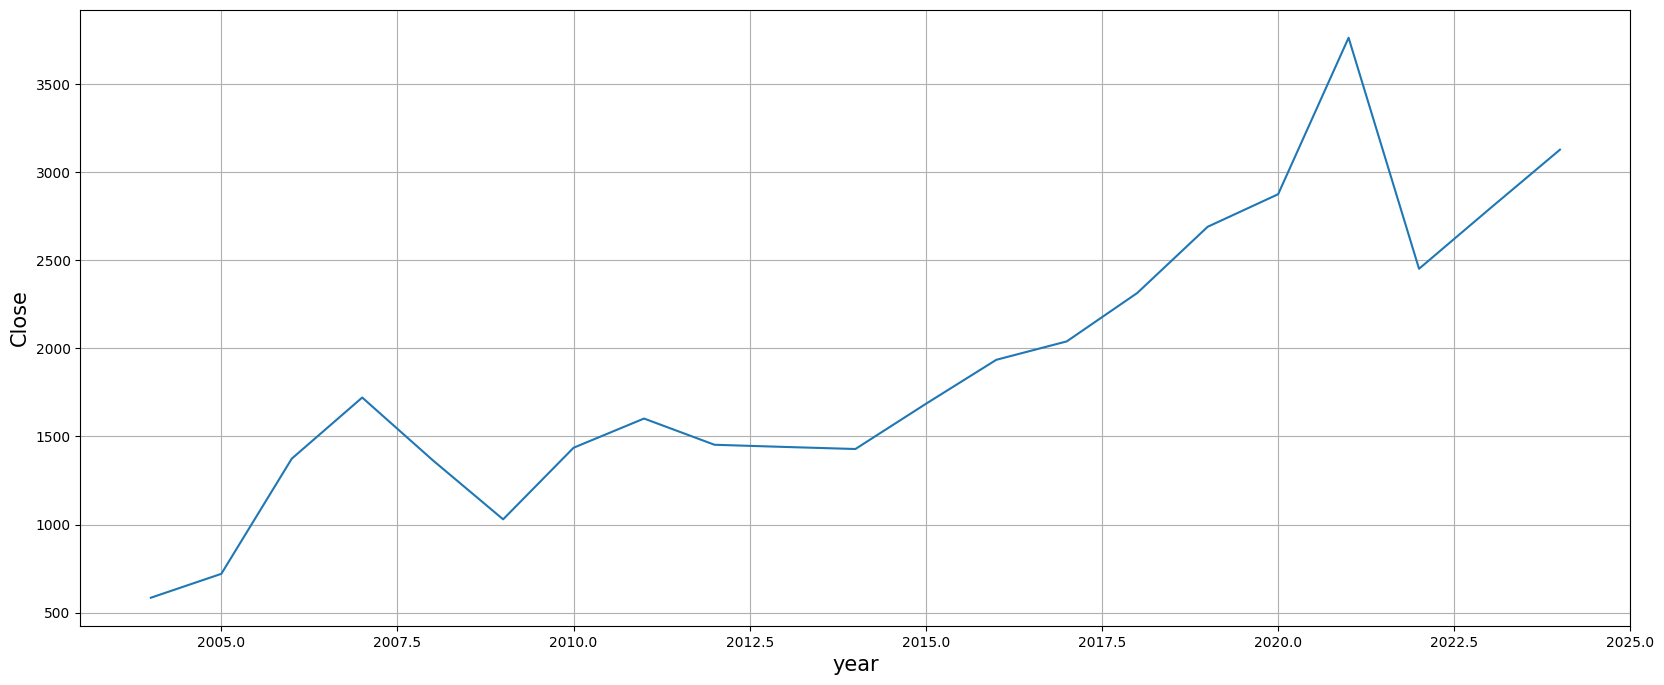

In [35]:
# строим график
price.plot(figsize=(20,8))
plt.grid();
plt.xlabel('year',fontsize=15)
plt.ylabel('Close',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

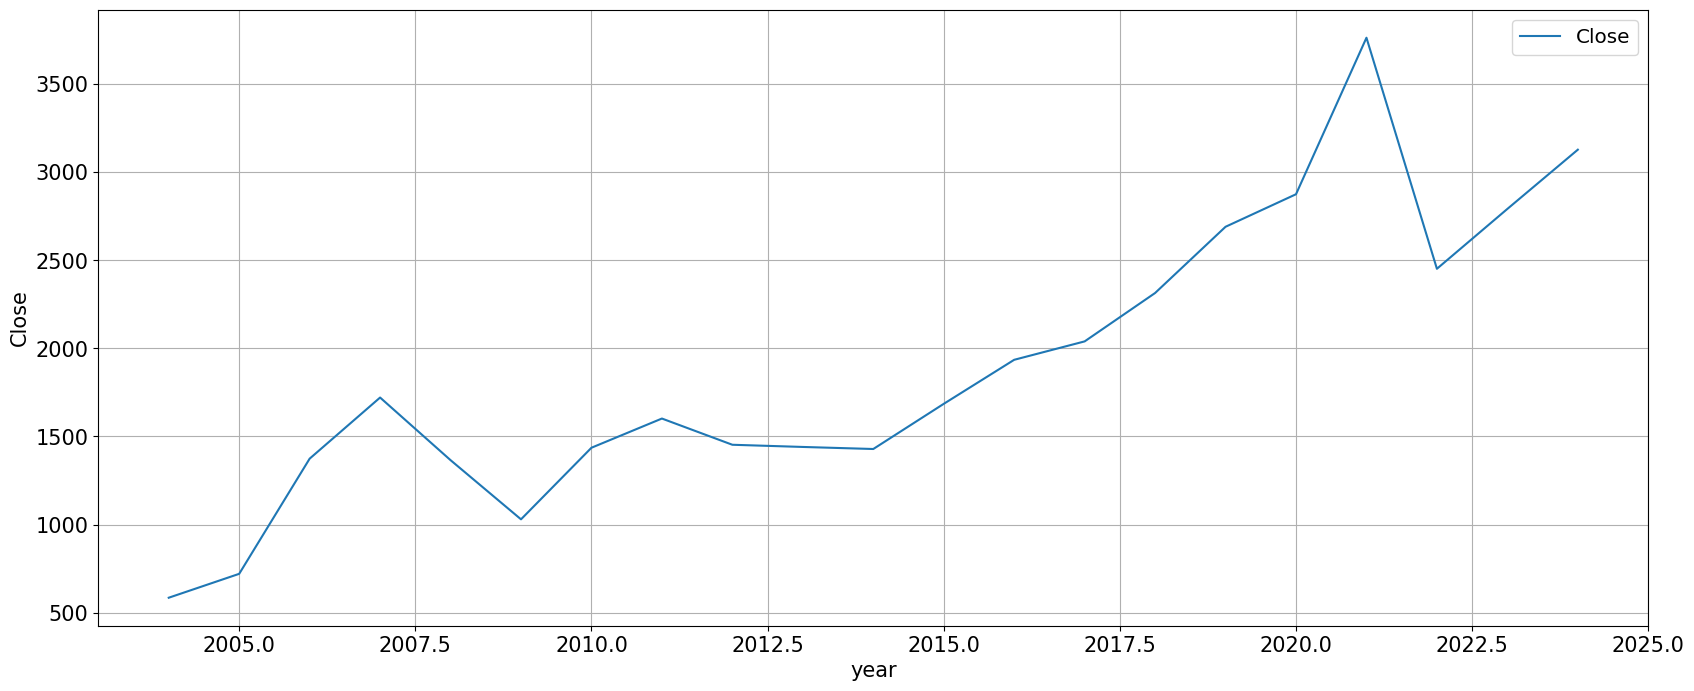

In [36]:
# строим график
price.plot(figsize=(20,8))
plt.grid();
plt.xlabel('year',fontsize=15)
plt.ylabel('Close',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Вывод: По-видимому, существует тенденция (к росту) и в отношении сезонности.

In [38]:
price.isnull().sum()

0

In [39]:
round(price.describe(),3)

count     21.000
mean    1896.643
std      815.376
min      585.017
25%     1428.956
50%     1685.244
75%     2451.666
max     3762.910
Name: Close, dtype: float64

Вывод: Значения индекса варьируются от 588.017 до 3762.910 единиц, что указывает на огромные различия в продажах по годам. Среднее значение индекса составляет 1896.643

In [41]:
ses = SimpleExpSmoothing(price)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

21   3023.530
dtype: float64


Одним из наиболее распространённых тестов на проверку временного ряда на стационарность является расширенный тест Дики — Фуллера. В тесте формулируется две гипотезы:

нулевая гипотеза (H0): временной ряд нестационарный, то есть имеет некоторый тренд и сезонную компоненту;
альтернативная гипотеза (H1): временной ряд стационарный, то есть не имеет тренда и сезонной компоненты, и данные скорее случайны.
В результате проведения теста мы получим несколько значений: значение статистики из теста и критические значения разных уровней значимости (1 %, 5 %, 10 %). Уровень значимости означает допустимую  для данной задачи вероятность ошибки, то есть чем ниже уровень значимости, тем ниже вероятность ошибочного результата теста.

Если значение статистики ниже критического значения выбранного уровня значимости, отвергаем гипотезу H0 и принимаем гипотезу H1 (ряд стационарный).
Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный).

In [43]:
price.squeeze()

result = adfuller(price.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -1.3433192491373085
p-value: 0.6091282039337181
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


Вывод: Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный).

Если тест на стационарность показал, что ряд нестационарный и в нём присутствуют тренд и сезонность, необходимо избавиться от них.

Обычно для этого достаточно взять разность рядов. Разность выполняется путём дифференцирования ряда, для этого вычисляется разность между двумя соседними наблюдениями ряда. Если полученная первая разность ряда окажется стационарной, то этот ряд называется интегрированным рядом первого порядка.

Для определения порядка интегрированного ряда необходимо сделать следующее:

Получить новый ряд посредством взятия разности (применяем к необходимому датафрейму):

In [44]:
df_diff = price.diff().dropna()

Провести для нового ряда тест на стационарность (например, тест Дики — Фуллера):

In [45]:
test1 = adfuller(df_diff)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -3.9423897532488494
p-value:  0.0017441091030299524
Critical values:  {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ряд стационарен


У автокорреляции много применений, но в первую очередь её используют для обработки сигналов, прогнозирования погоды и анализа рынка ценных бумаг. Иногда автокорреляция позволяет обнаружить скрытые тенденции.

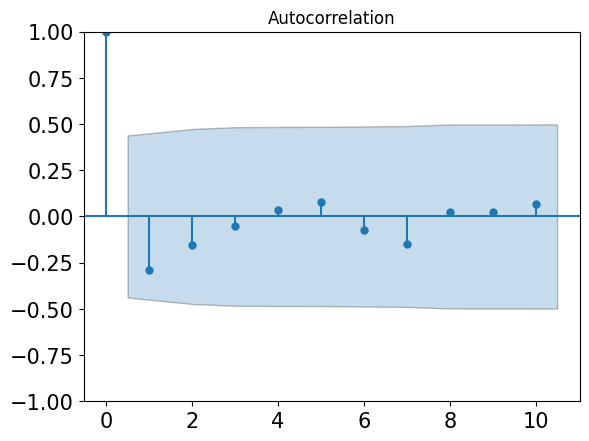

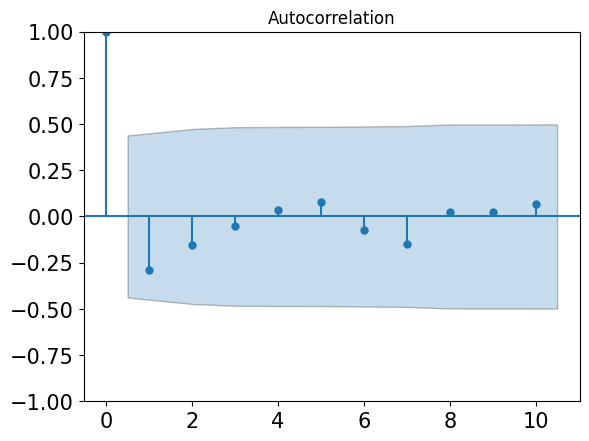

In [47]:
# строим автокорреляцию
plot_acf(df_diff)

### <span style="color:blue">Выводы и комментарии:</span>

Если максимальное значение коррелограммы (не считая значения в нуле) оказывается выраженным для лага, равного  (на рисунке выше 1, то временной ряд содержит циклическую компоненту с периодом 1. То есть данные являются зависимыми/схожими с данными, находящимися на расстоянии 1 день/неделя и т. д.

Данные ряда, кроме первого лага, случайны и не зависят от себя в прошлом. Тренд явно выражен, так как в единице модуль лага максимален.

[Оглавление ⬆️](#item-zero)

## 3. Exploratory Data Analysis-EDA (Разведывательный анализ данных) <a id="item-three"></a>

## 3.1. Предобработка, очистка и анализ данных акции <a id="item-three-one"></a>

## 3.1.1. Предобработка, очистка и анализ данных акции Тесла <a id="item-three-one-one"></a>

Для чистоты эксперимента загружаем новые данные через другой представленный ресурс

In [48]:
import numpy as np
import yfinance as yf
ticker = 'TSLA'
tkr = yf.Ticker(ticker)
df = tkr.history(period='1y')
#df.to_csv('data_tsla_1y.csv')


Результат представлен в формате pandas DataFrame и выглядит примерно
следующим образом: 

In [49]:
df = pd.read_csv("data_tsla_1y.csv", sep=",")
# выводим информацию о размерности и табличной структуре данных (голова - хвост)
print("Размер данных: {}".format(df.shape))
display(df.head(3))
display(df.tail(1))

Размер данных: (252, 8)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-10-05 00:00:00-04:00,260.000,263.600,256.250,260.050,119159200,0.000,0.000
1,2023-10-06 00:00:00-04:00,253.980,261.650,250.650,260.530,117947000,0.000,0.000
2,2023-10-09 00:00:00-04:00,255.310,261.360,252.050,259.670,101377900,0.000,0.000


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
251,2024-10-04 00:00:00-04:00,246.690,250.960,244.580,250.080,86573200,0.000,0.000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          252 non-null    object 
 1   Open          252 non-null    float64
 2   High          252 non-null    float64
 3   Low           252 non-null    float64
 4   Close         252 non-null    float64
 5   Volume        252 non-null    int64  
 6   Dividends     252 non-null    float64
 7   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.9+ KB


В целом признаки по своему составу имеют одну и ту же структуру и в основном несут аналогичное представление.
Имеем дело со статистическими данными о стоимости акции Тесла. 

Так как два признака Dividends и Stock Splits имеют нулевые значения и тем самым не несут смысловой нагрузки, предлагается исключить их из наших данных.

In [51]:
# Очистка данных
df.drop('Dividends', axis=1, inplace=True)
df.drop('Stock Splits', axis=1, inplace=True)

In [52]:
# работа с датой
df['Date'] = pd.to_datetime(df['Date'],utc=True)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [53]:
print("Размер данных: {}".format(df.shape))
display(df.head(3))
display(df.tail(1))

Размер данных: (252, 6)


,Date,Open,High,Low,Close,Volume
0,2023-10-05,260.000,263.600,256.250,260.050,119159200
1,2023-10-06,253.980,261.650,250.650,260.530,117947000
2,2023-10-09,255.310,261.360,252.050,259.670,101377900


,Date,Open,High,Low,Close,Volume
251,2024-10-04,246.690,250.960,244.580,250.080,86573200


In [54]:
# группировка
df_1 = df['Close'].groupby(df['Date']).mean()

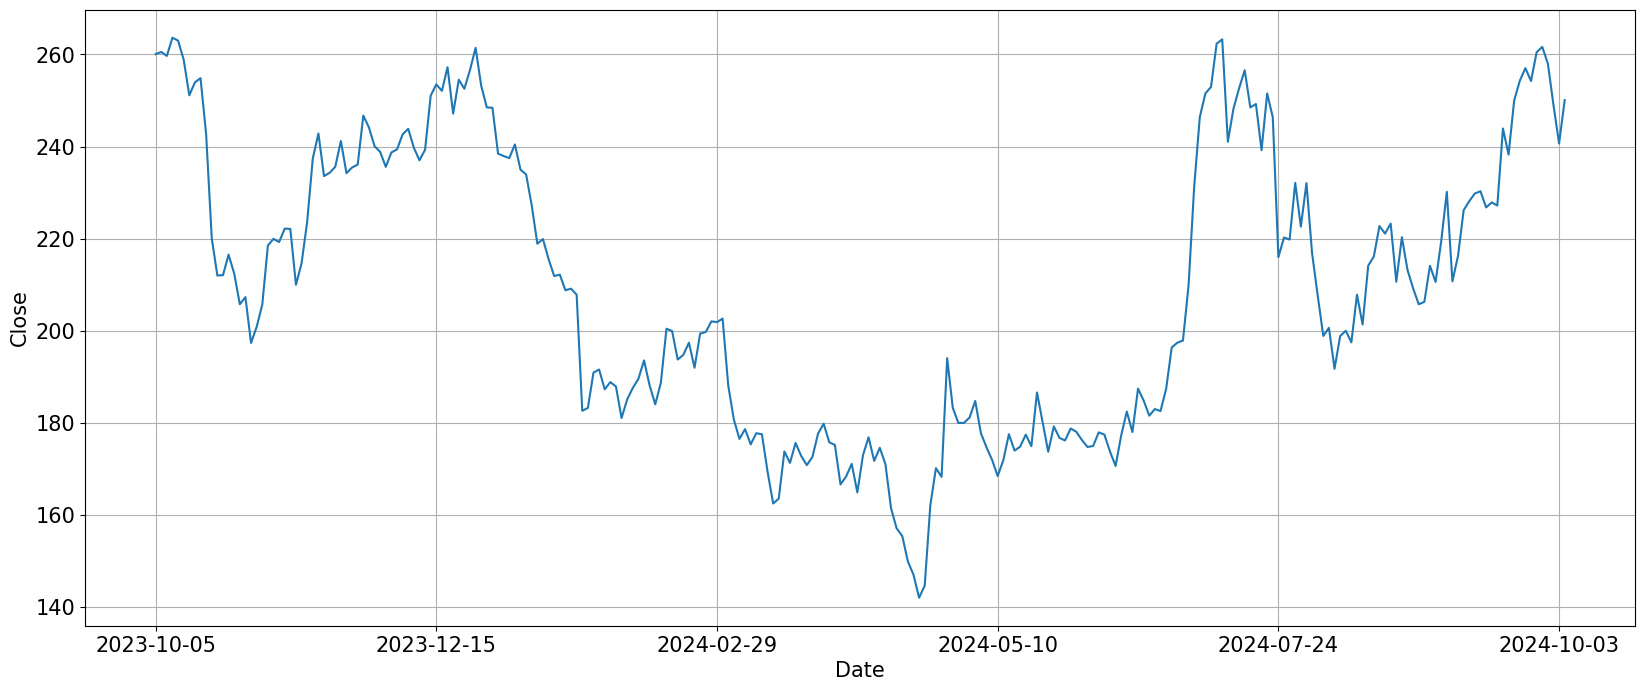

In [55]:
# строим график
df_1.plot(figsize=(20,8))
plt.grid()
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

In [56]:
# Проверка недостающих значений
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Статистическое описание данных:

In [57]:
round(df.describe(),3)

,Open,High,Low,Close,Volume
count,252.000,252.000,252.000,252.000,252.000
mean,209.280,213.500,205.019,209.263,101274800.397
std,30.944,31.471,30.244,30.902,30217871.321
min,140.560,144.440,138.800,142.050,50869700.000
25%,181.950,184.505,176.980,180.005,79625875.000
50%,210.015,214.845,205.775,208.970,100062200.000
75%,235.763,240.445,232.520,237.600,117981450.000
max,266.200,271.000,260.900,263.620,243869700.000


Вывод: Продажи акции компании tesla варьируются от 142.050 до 263.620 единиц, что указывает на огромные различия в продажах по месяцам. Средний объем продаж составляет 209.263

In [58]:
# работа с датой
df_2 = df.copy()
df_2['Date'] = pd.to_datetime(df_2['Date'],utc=True)
df_2['Date'] = df_2['Date'].dt.strftime('%Y-%m')
#df_2['month'] = df_2['Date'].dt.month
#df_2.drop('Date', axis=1, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


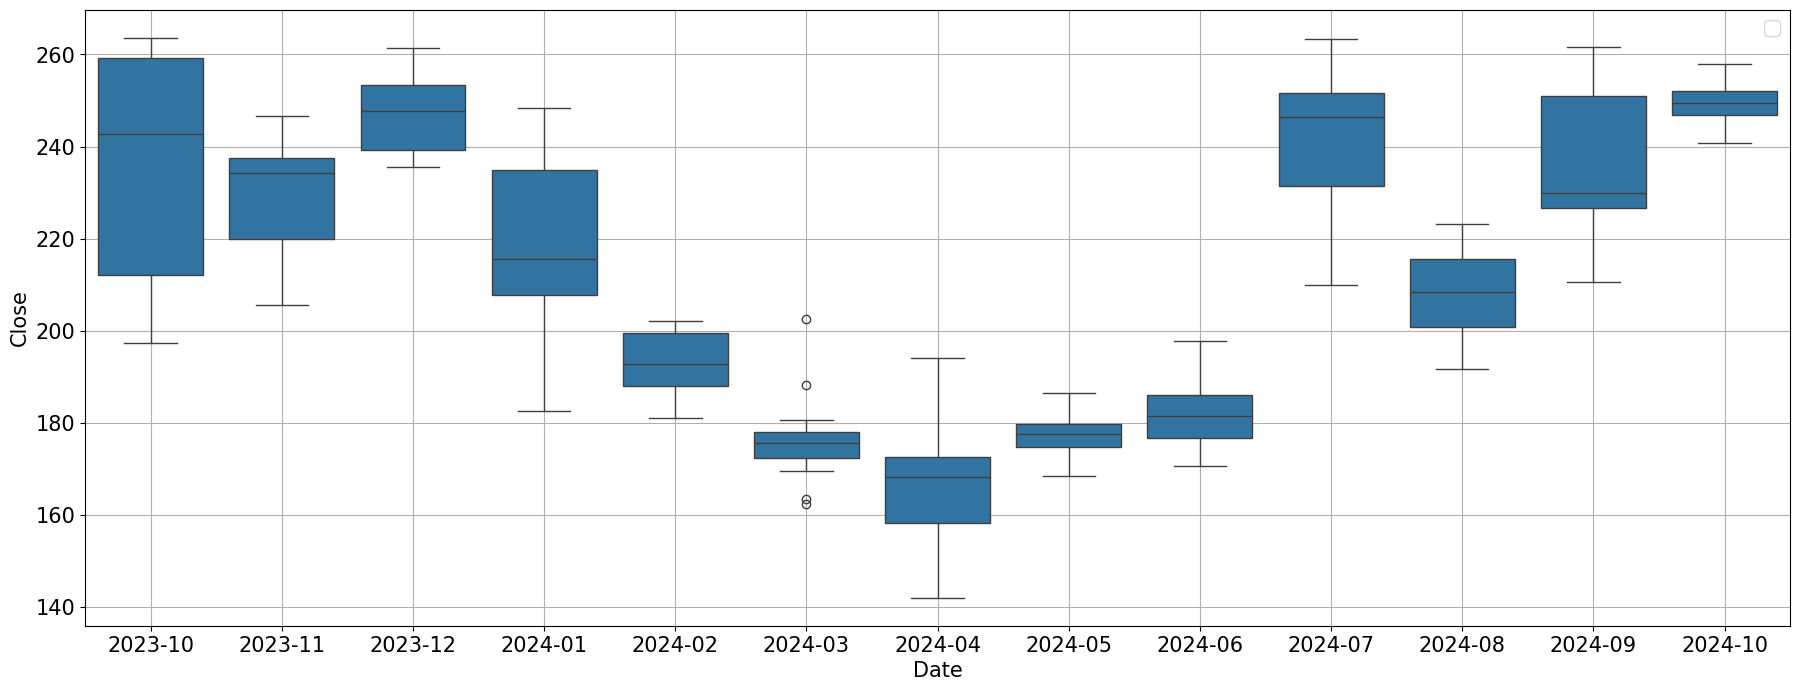

In [59]:
# строим график
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_2['Date'], y = df_2['Close'], ax=ax)
plt.grid()
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Возможно, что у нас каждый год есть сезонная составляющая. Кроме того, мы видим, что выбросов нет.

Построение эмпирического кумулятивного распределения:

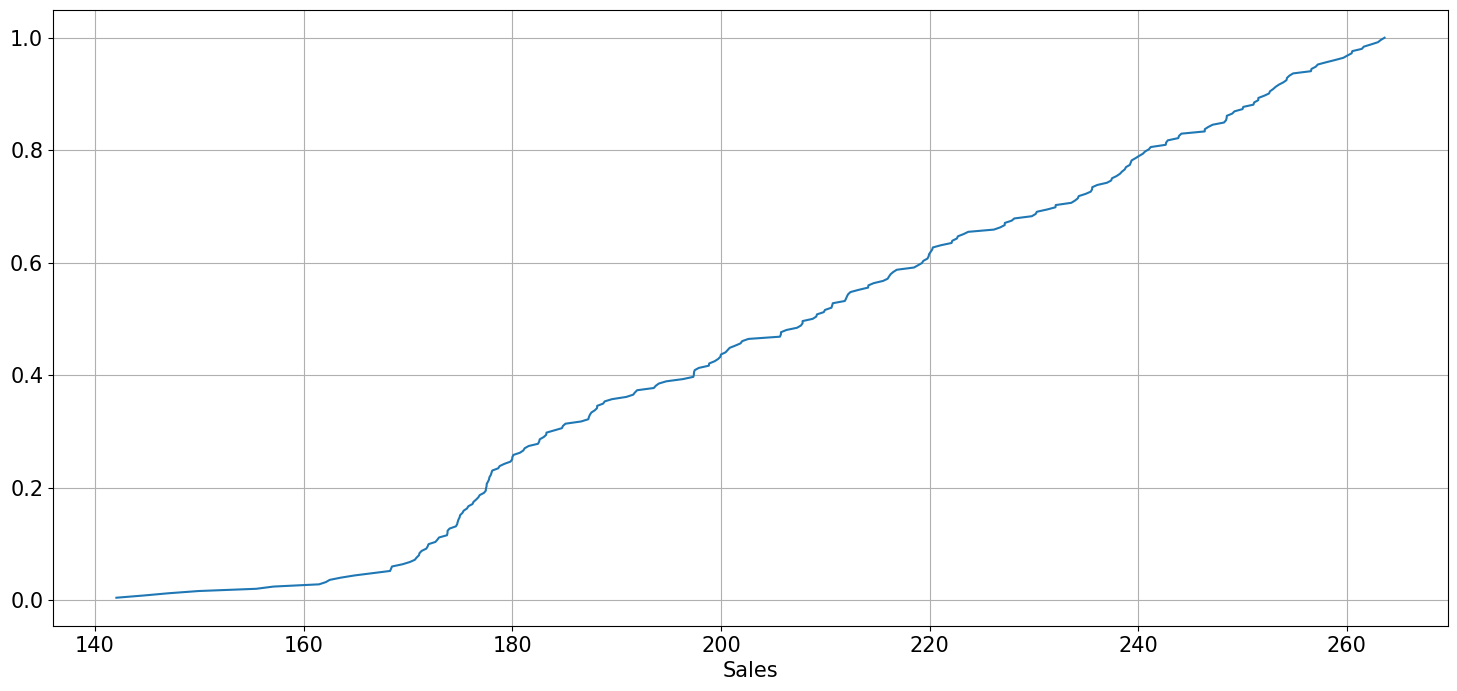

In [61]:
# строим график
plt.figure(figsize = (18, 8))
cdf = ECDF(df_2['Close'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Sales', fontsize = 15);

Вывод: Около 60% всех месяцев продажи составляли 220 единиц или меньше.

Построим график средних продаж за месяц и процентного изменения продаж от месяца к месяцу:

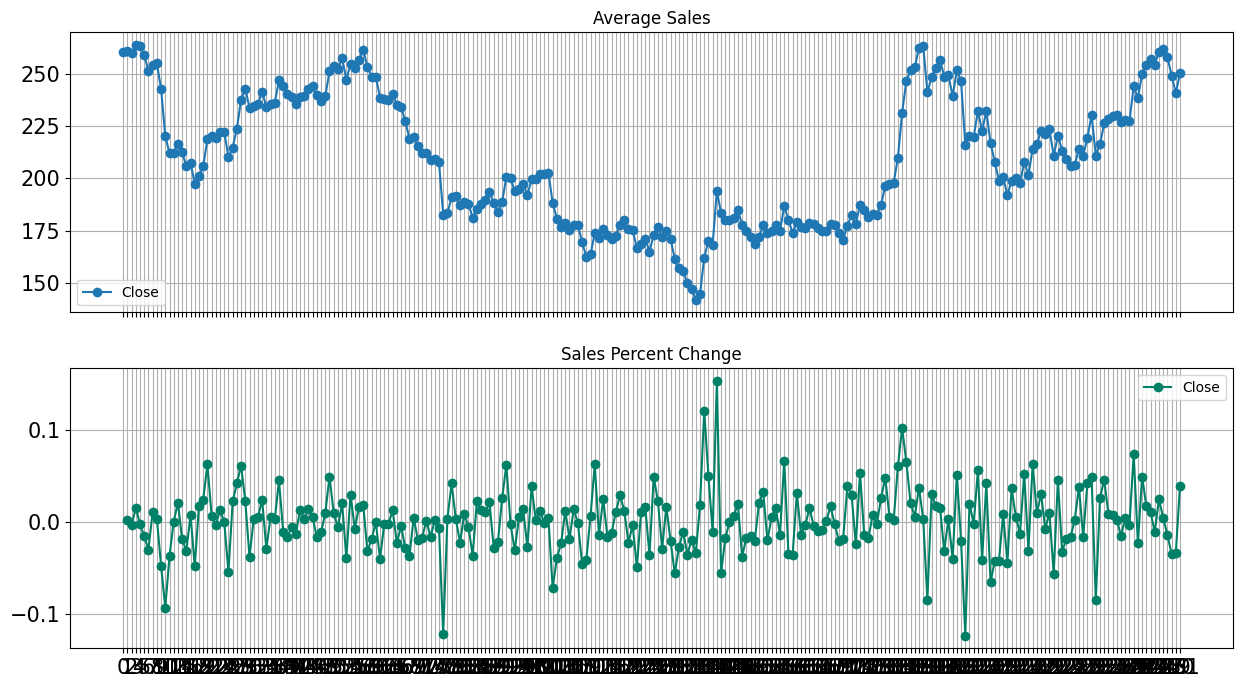

In [62]:
# сгруппировать по дате и получить среднее количество цены
average    = df_2.groupby(df_2.index)["Close"].mean()
pct_change = df_2.groupby(df_2.index)["Close"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# строим график
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# График процентного изменения цены с течением времени (год-месяц)
ax2 = pct_change.plot( legend=True,ax=axis2,marker='o', colormap="summer", title="Sales Percent Change", grid=True )

Вывод: Ежемесячно продажи меняются в огромном проценте.

Декомпозиция временных рядов и построение графиков различных компонентов.

In [63]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #чтобы были читаемы вещественные числа
df_2.describe()

,Open,High,Low,Close,Volume
count,252.000,252.000,252.000,252.000,252.000
mean,209.280,213.500,205.019,209.263,101274800.397
std,30.944,31.471,30.244,30.902,30217871.321
min,140.560,144.440,138.800,142.050,50869700.000
25%,181.950,184.505,176.980,180.005,79625875.000
50%,210.015,214.845,205.775,208.970,100062200.000
75%,235.763,240.445,232.520,237.600,117981450.000
max,266.200,271.000,260.900,263.620,243869700.000


In [64]:
df_2.head()

,Date,Open,High,Low,Close,Volume
0,2023-10,260.000,263.600,256.250,260.050,119159200
1,2023-10,253.980,261.650,250.650,260.530,117947000
2,2023-10,255.310,261.360,252.050,259.670,101377900
3,2023-10,257.750,268.940,257.650,263.620,122656000
4,2023-10,266.200,268.600,260.900,262.990,103706300


In [65]:
# превратим дату в индекс и сделаем изменение постоянным
df_2.set_index('Date', inplace = True)
df_2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-10,260.000,263.600,256.250,260.050,119159200
2023-10,253.980,261.650,250.650,260.530,117947000
2023-10,255.310,261.360,252.050,259.670,101377900
2023-10,257.750,268.940,257.650,263.620,122656000
2023-10,266.200,268.600,260.900,262.990,103706300


Python воспринимает дату как число. Это не очень удобно, если мы хотим делать срезы и в целом изменять данные во времени. Дату можно преобразовать в специальный объект datetime.

In [66]:
# превратим дату (наш индекс) в объект datetime
df_2.index = pd.to_datetime(df_2.index)
 
# посмотрим на первые пять дат и на тип данных
df_2.index[:5]

DatetimeIndex(['2023-10-01', '2023-10-01', '2023-10-01', '2023-10-01',
               '2023-10-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

<Axes: xlabel='Date'>

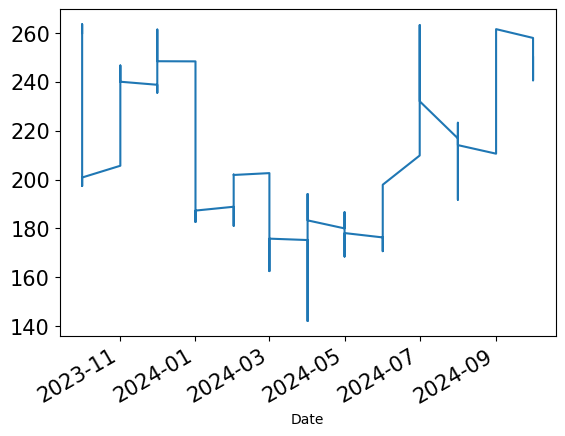

In [67]:
# Построим график
df_2['Close'].plot()

Выведем на одном графике продажи акции и скользящее среднее.

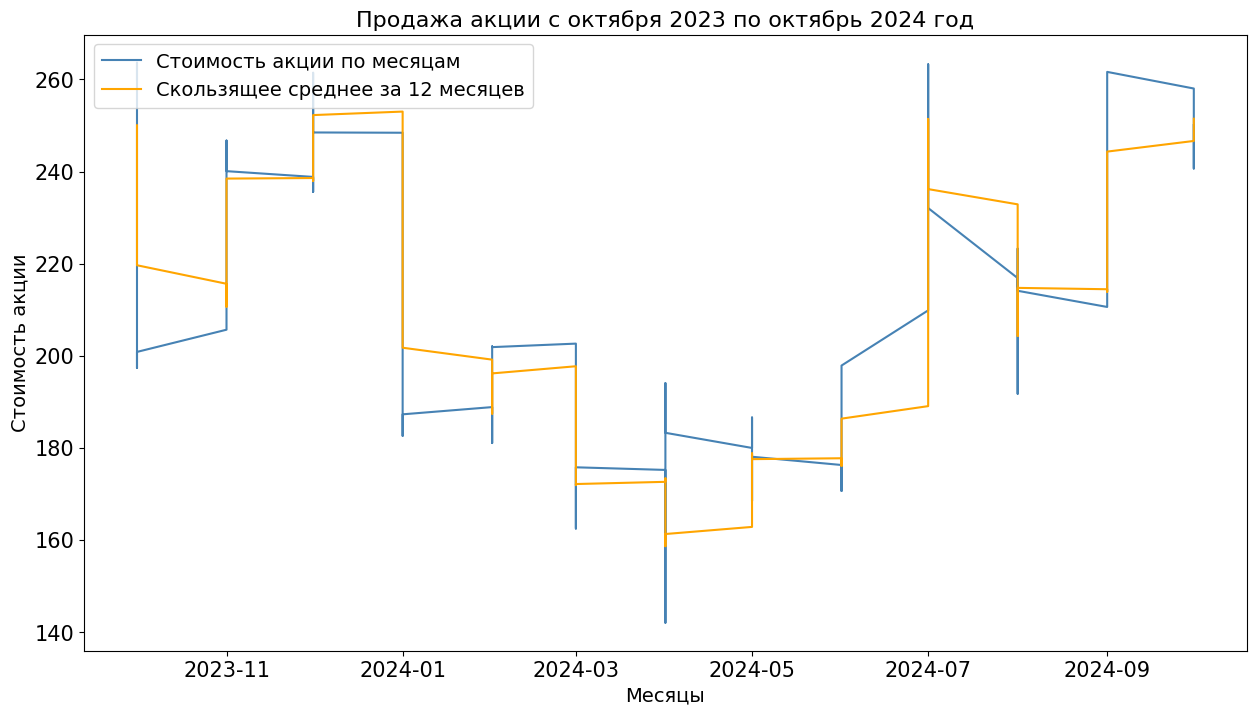

In [68]:
# зададим размер графика
plt.figure(figsize = (15,8))
 
# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(df_2['Close'], label = 'Стоимость акции по месяцам', color = 'steelblue')
plt.plot(df_2['Close'].rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Стоимость акции', fontsize = 14)
plt.title('Продажа акции с октября 2023 по октябрь 2024 год', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

[Оглавление ⬆️](#item-zero)

## 3.1.2. Предобработка, очистка и анализ данных акции Аэрофлот <a id="item-three-one-two"></a>

Проведем еще один эксперимент с данными по стоимости акций компании Аэрофлот

In [69]:
# импортируем файл с данными о стоимости акции
df = pd.read_csv("AFLT.csv")
df.head()

,TRADEDATE,CLOSE,VOLUME
0,2013-10-31,57.400,2779400
1,2013-11-01,57.380,2286300
2,2013-11-05,56.850,729000
3,2013-11-06,57.400,1320900
4,2013-11-07,58.450,2112000


In [70]:
# выводим информацию о размерности и табличной структуре данных (голова - хвост)
print("Размер данных: {}".format(df.shape))
display(df.head(3))
display(df.tail(1))

Размер данных: (2755, 3)


,TRADEDATE,CLOSE,VOLUME
0,2013-10-31,57.400,2779400
1,2013-11-01,57.380,2286300
2,2013-11-05,56.850,729000


,TRADEDATE,CLOSE,VOLUME
2754,2024-10-02,52.630,21561390


In [71]:
# превратим дату в индекс и сделаем изменение постоянным
df.set_index('TRADEDATE', inplace = True)
df.head()

,CLOSE,VOLUME
TRADEDATE,,
2013-10-31,57.400,2779400
2013-11-01,57.380,2286300
2013-11-05,56.850,729000
2013-11-06,57.400,1320900
2013-11-07,58.450,2112000


In [72]:
# превратим дату (наш индекс) в объект datetime
df.index = pd.to_datetime(df.index)

# посмотрим на первые пять дат и на тип данных
df.index[:5]


DatetimeIndex(['2013-10-31', '2013-11-01', '2013-11-05', '2013-11-06',
               '2013-11-07'],
              dtype='datetime64[ns]', name='TRADEDATE', freq=None)

In [73]:
# изменим шаг наших данных; например, посмотрим средние данные по годам
df_years = df.resample(rule = 'AS').mean()
df_years

,CLOSE,VOLUME
TRADEDATE,,
2013-01-01,67.040,3511066.667
2014-01-01,53.327,5080002.000
2015-01-01,41.668,4886226.800
2016-01-01,92.612,4192976.984
2017-01-01,177.906,4598958.730
2018-01-01,125.942,5553921.654
2019-01-01,102.188,4270017.698
2020-01-01,80.863,23511459.440
2021-01-01,67.898,12894976.588


In [74]:
# выводим информацию о размерности и табличной структуре данных (голова - хвост)
print("Размер данных: {}".format(df_years.shape))
display(df_years.head(3))
display(df_years.tail(3))

Размер данных: (12, 2)


,CLOSE,VOLUME
TRADEDATE,,
2013-01-01,67.040,3511066.667
2014-01-01,53.327,5080002.000
2015-01-01,41.668,4886226.800


,CLOSE,VOLUME
TRADEDATE,,
2022-01-01,32.157,10112190.516
2023-01-01,37.271,16006714.488
2024-01-01,48.943,30024297.031


In [75]:
# произведем сдвиг на два периода (в данном случае года) вперед
df_years.shift(2, axis = 0).head()

,CLOSE,VOLUME
TRADEDATE,,
2013-01-01,NaN,NaN
2014-01-01,NaN,NaN
2015-01-01,67.040,3511066.667
2016-01-01,53.327,5080002.000
2017-01-01,41.668,4886226.800


После сдвига первые два значения определяются как пропущенные (NaN или Not a number).

In [76]:
# выводим информацию о размерности и табличной структуре данных (голова - хвост)
print("Размер данных: {}".format(df_years.shape))
display(df_years.head(3))
display(df_years.tail(3))

Размер данных: (12, 2)


,CLOSE,VOLUME
TRADEDATE,,
2013-01-01,67.040,3511066.667
2014-01-01,53.327,5080002.000
2015-01-01,41.668,4886226.800


,CLOSE,VOLUME
TRADEDATE,,
2022-01-01,32.157,10112190.516
2023-01-01,37.271,16006714.488
2024-01-01,48.943,30024297.031


Построение графиков

<Axes: xlabel='TRADEDATE'>

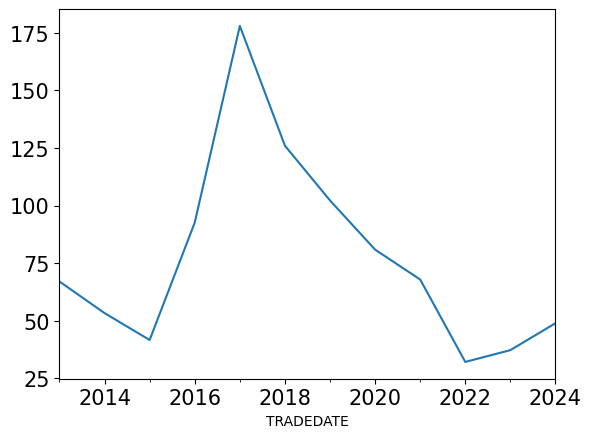

In [77]:
# построим простой график изменения данных во времени прямо в библиотеке Pandas
df_years['CLOSE'].plot()

Рассчитаем скользящее среднее для наших данных. Период, за который рассчитывается скользящее среднее, также называется окном (window).

In [78]:
# рассчитаем скользящее среднее для трех месяцев
df_years.rolling(window = 2).mean()

,CLOSE,VOLUME
TRADEDATE,,
2013-01-01,NaN,NaN
2014-01-01,60.184,4295534.333
2015-01-01,47.498,4983114.400
2016-01-01,67.140,4539601.892
2017-01-01,135.259,4395967.857
2018-01-01,151.924,5076440.192
2019-01-01,114.065,4911969.676
2020-01-01,91.526,13890738.569
2021-01-01,74.380,18203218.014


Построение графиков: 

Для того чтобы построить график временного ряда мы можем воспользоваться инструментами, которые уже содержатся в библиотеке Pandas. Например, простым методом .plot().

<Axes: xlabel='TRADEDATE'>

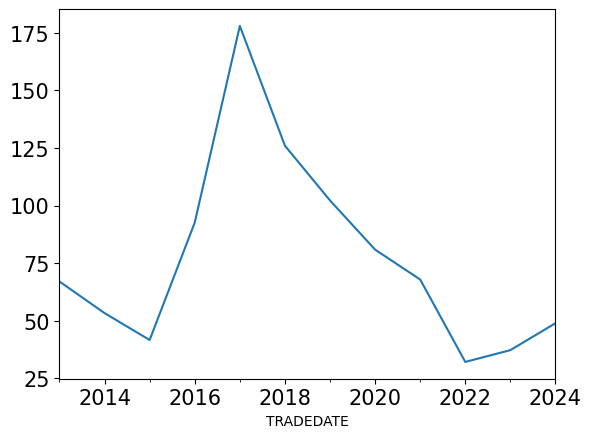

In [79]:
# для продаж
df_years['CLOSE'].plot()

<Axes: xlabel='TRADEDATE'>

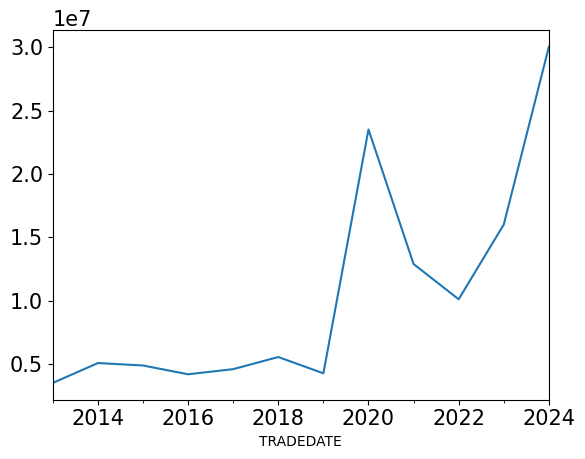

In [80]:
# для объма торгов
df_years['VOLUME'].plot()

Визуализацию можно также построить с помощью библиотеки Matplotlib. Давайте выведем на одном графике стоимость и скользящее среднее.

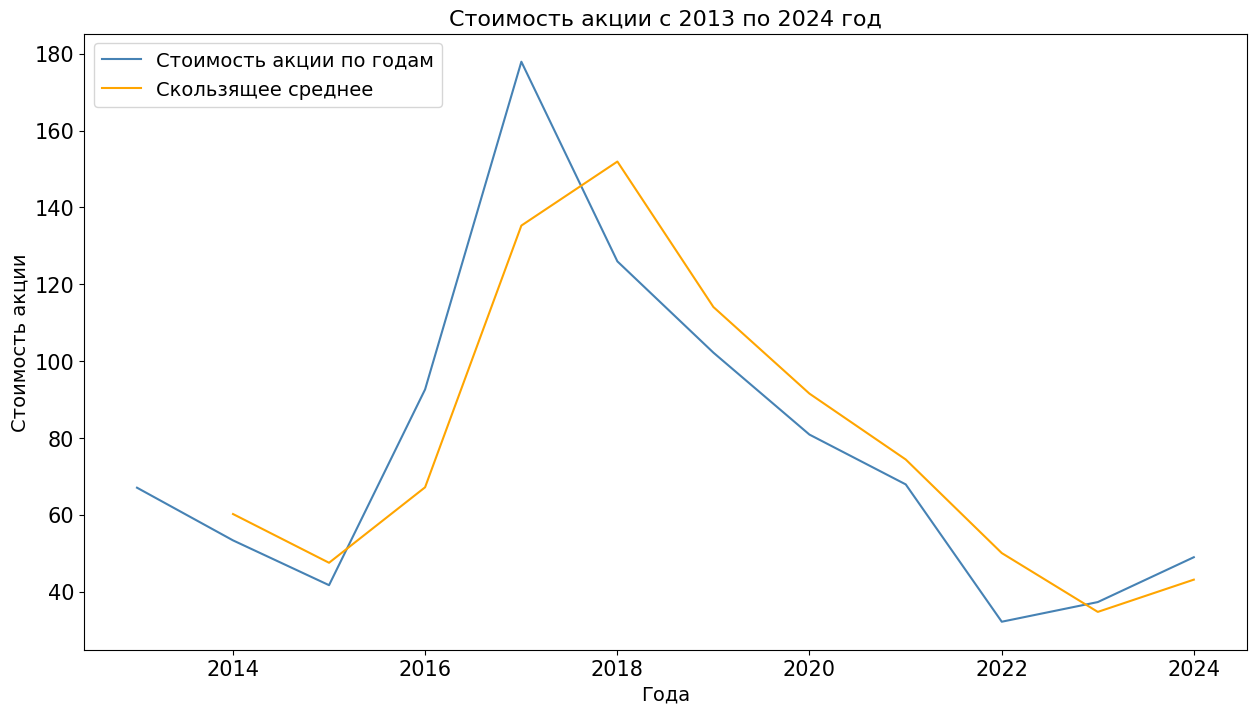

In [81]:
# Для стоимости акции
# зададим размер графика
plt.figure(figsize = (15,8))
 
# поочередно зададим кривые (стоимости и скользящее среднее) с подписями и цветом
plt.plot(df_years['CLOSE'], label = 'Стоимость акции по годам', color = 'steelblue')
plt.plot(df_years['CLOSE'].rolling(window = 2).mean(), label = 'Скользящее среднее', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Года', fontsize = 14)
plt.ylabel('Стоимость акции', fontsize = 14)
plt.title('Стоимость акции с 2013 по 2024 год', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

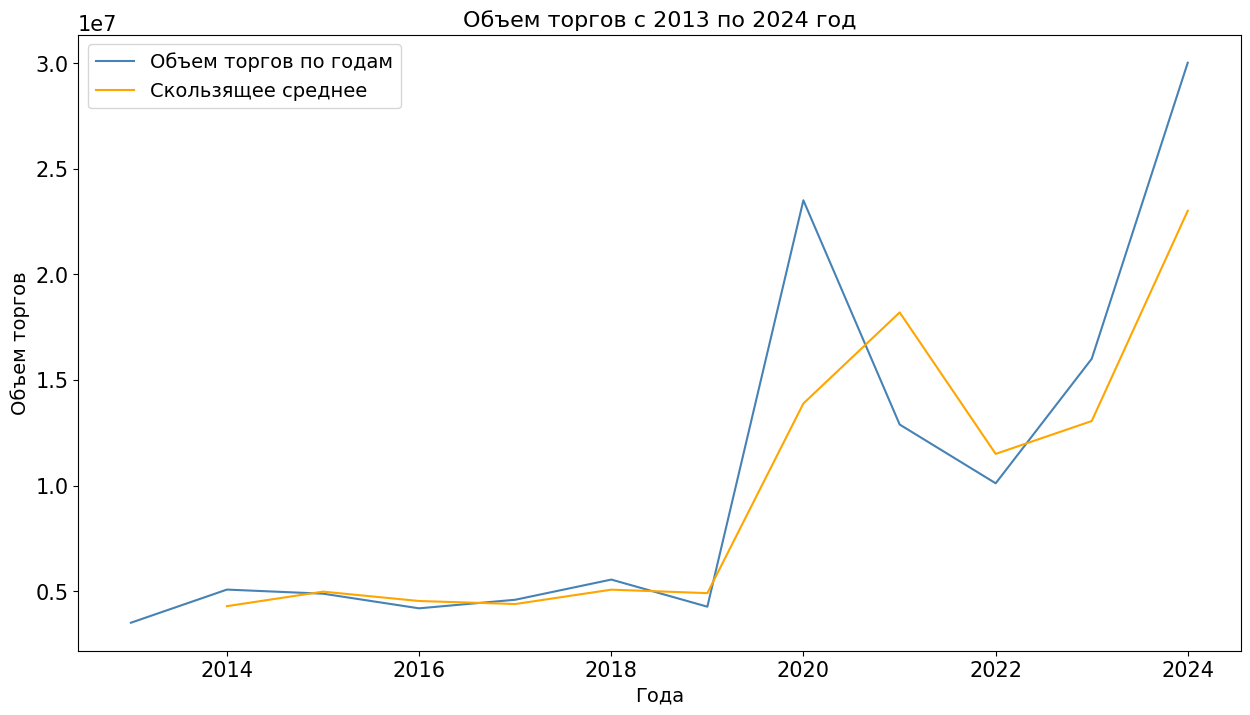

In [82]:
# Для объема торгов
# зададим размер графика
plt.figure(figsize = (15,8))
 
# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(df_years['VOLUME'], label = 'Объем торгов по годам', color = 'steelblue')
plt.plot(df_years['VOLUME'].rolling(window = 2).mean(), label = 'Скользящее среднее', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('Года', fontsize = 14)
plt.ylabel('Объем торгов', fontsize = 14)
plt.title('Объем торгов с 2013 по 2024 год', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

Вывод: В целом, скользящее среднее сглаживает показатели.

Разложение временного ряда на компоненты


Выявление компонентов временного ряда (time series decomposition) предполагает его разложение на тренд, сезонность и случайные колебания. Дадим несколько неформальных определений.

Тренд — долгосрочное изменение уровня ряда
Сезонность предполагает циклические изменения уровня ряда с постоянным периодом
Случайные колебания — непрогнозируемое случайное изменение ряда
В Питоне в модуле statsmodels есть функция seasonal_decompose(). Воспользуемся ей для визуализации компонентов ряда.

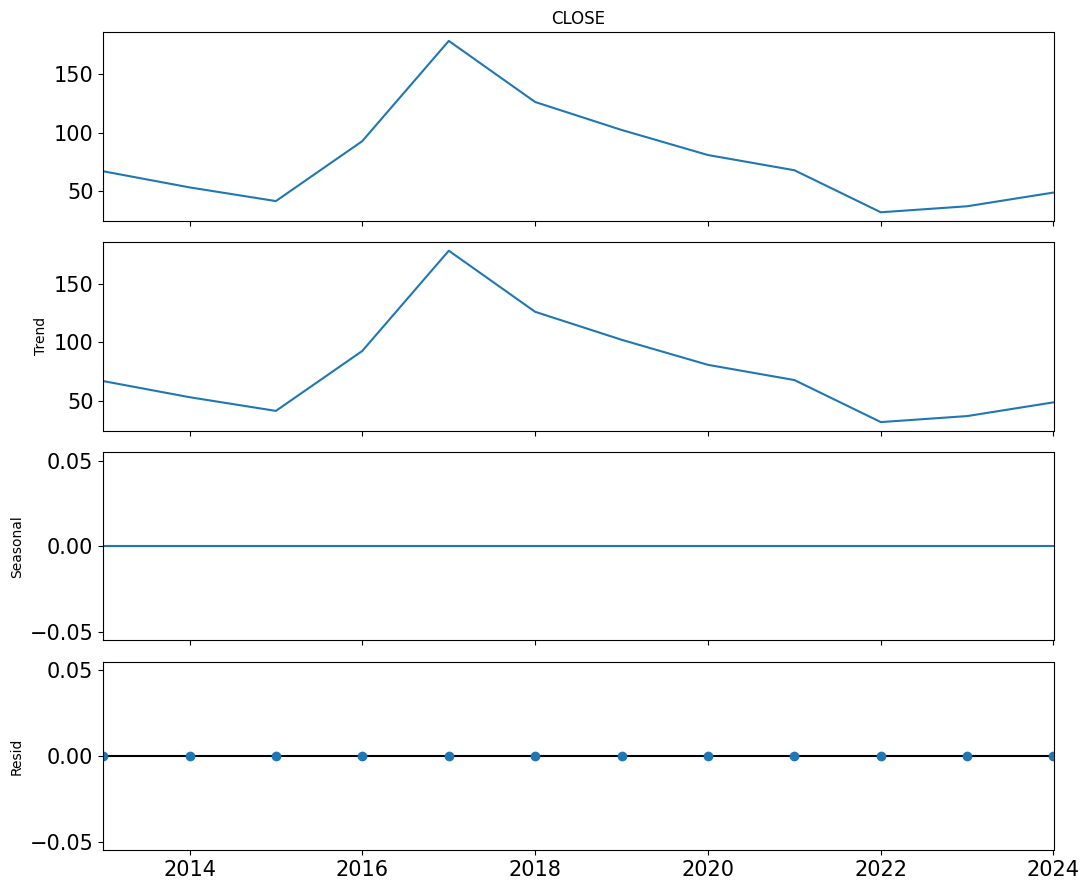

In [84]:
# задаем размер графика
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о стоимости
decompose = seasonal_decompose(df_years['CLOSE'])
decompose.plot()
 
plt.show()

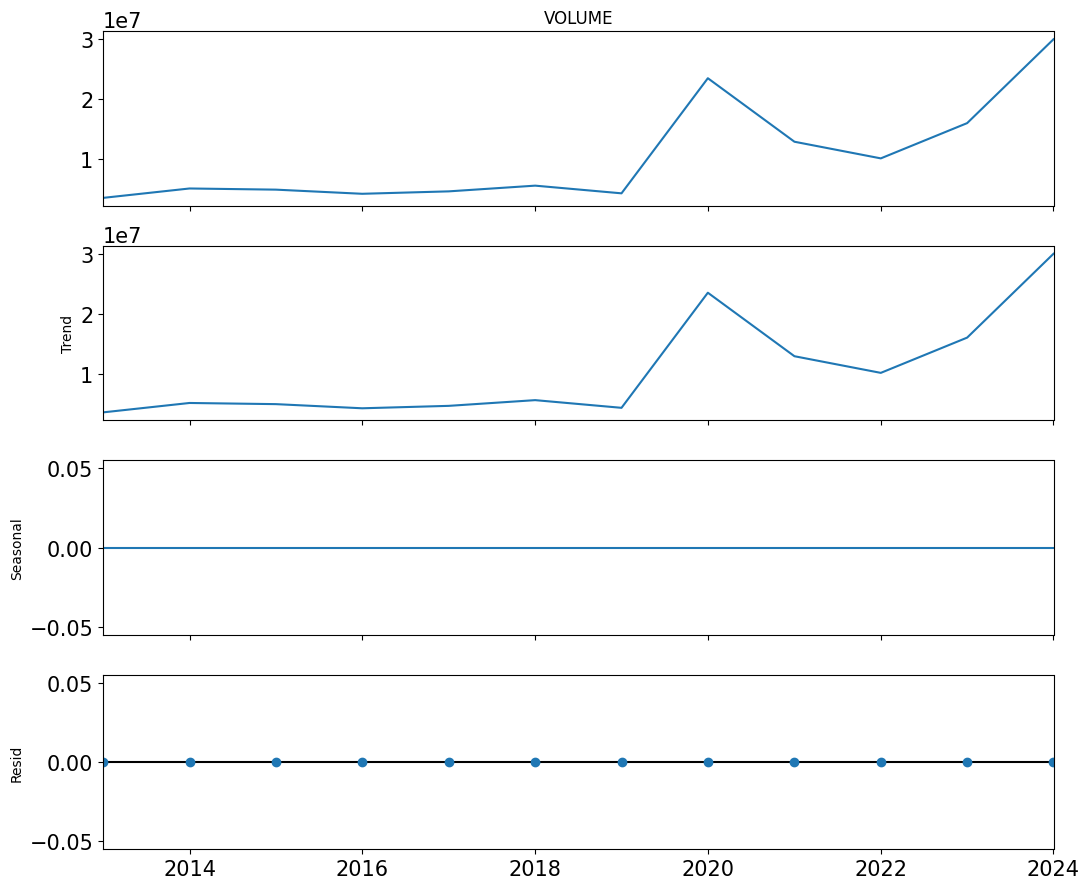

In [85]:
# задаем размер графика
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным об объемах торгов
decompose = seasonal_decompose(df_years['VOLUME'])
decompose.plot()
 
plt.show()

[Оглавление ⬆️](#item-zero)

#### 3.1.3. Предобработка, очистка и анализ данных акций компании аэрофлот за месяц <a id="item-three-one-three"></a>

Предлагается рассмотреть анализ данных за месяц

In [87]:
# для наглядности импортируем сначала
# сразу превратим дату в индекс и преобразуем ее в объект datetime
df_aflt = pd.read_csv('AFLT.csv', index_col = 'TRADEDATE', parse_dates = True)
df_aflt.head(3)

,CLOSE,VOLUME
TRADEDATE,,
2013-10-31,57.400,2779400
2013-11-01,57.380,2286300
2013-11-05,56.850,729000


С учетом неопределенности, а также фундаментального анализа фондового рынка, предлагается рассмотреть период месяца, в связи с чем сделаем срез за определенный период, например, с 1 по 31 июня 2024 года.

In [88]:
df_aflt_06 = df_aflt['2024-06-01':'2024-06-30']
df_aflt_06


,CLOSE,VOLUME
TRADEDATE,,
2024-06-03,53.680,52424580
2024-06-04,57.000,35891520
2024-06-05,56.700,40242600
2024-06-06,56.390,16038290
2024-06-07,58.510,30430270
2024-06-10,57.800,32548550
2024-06-11,58.940,31437060
2024-06-13,59.320,29387450
2024-06-14,62.820,92678080


Рассчитаем скользящее среднее по продажам для июля

In [89]:
# рассчитаем скользящее среднее для 2 дней, т.к. рабочая неделя
df_aflt_06.rolling(window = 2).mean()

,CLOSE,VOLUME
TRADEDATE,,
2024-06-03,NaN,NaN
2024-06-04,55.340,44158050.000
2024-06-05,56.850,38067060.000
2024-06-06,56.545,28140445.000
2024-06-07,57.450,23234280.000
2024-06-10,58.155,31489410.000
2024-06-11,58.370,31992805.000
2024-06-13,59.130,30412255.000
2024-06-14,61.070,61032765.000


Построение графиков

[Text(0.5, 1.0, 'Стоимость акции в период с 1 по 30 июня 2024 года'),
 Text(0.5, 0, 'День'),
 Text(0, 0.5, 'Цена')]

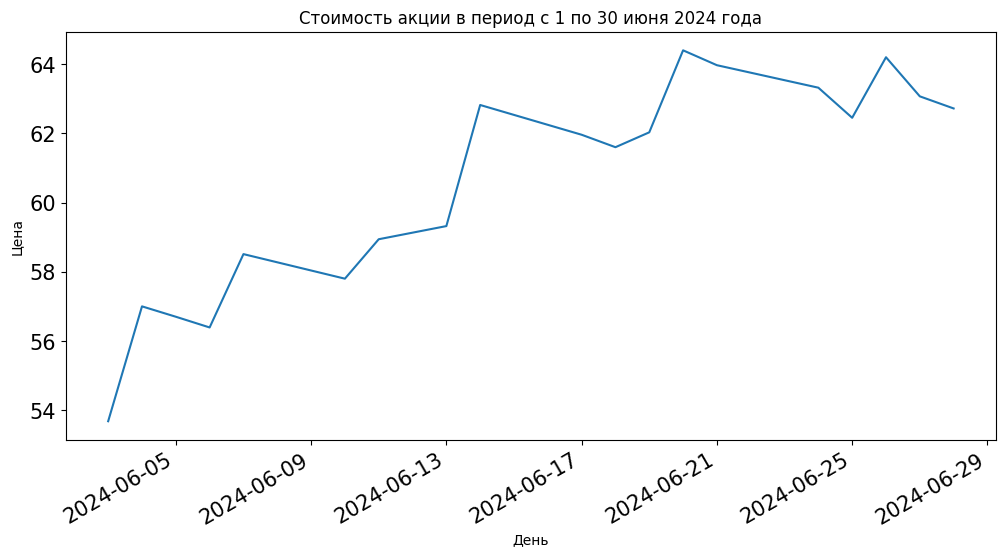

In [90]:
# изменим размер графика, уберем легенду и добавим подписи
ax = df_aflt_06['CLOSE'].plot(figsize = (12,6), legend = None)
ax.set(title = 'Стоимость акции в период с 1 по 30 июня 2024 года', xlabel = 'День', ylabel = 'Цена')


[Text(0.5, 1.0, 'Объем торгов акции в период с 1 по 30 июня 2024 года'),
 Text(0.5, 0, 'День'),
 Text(0, 0.5, 'Объем торгов')]

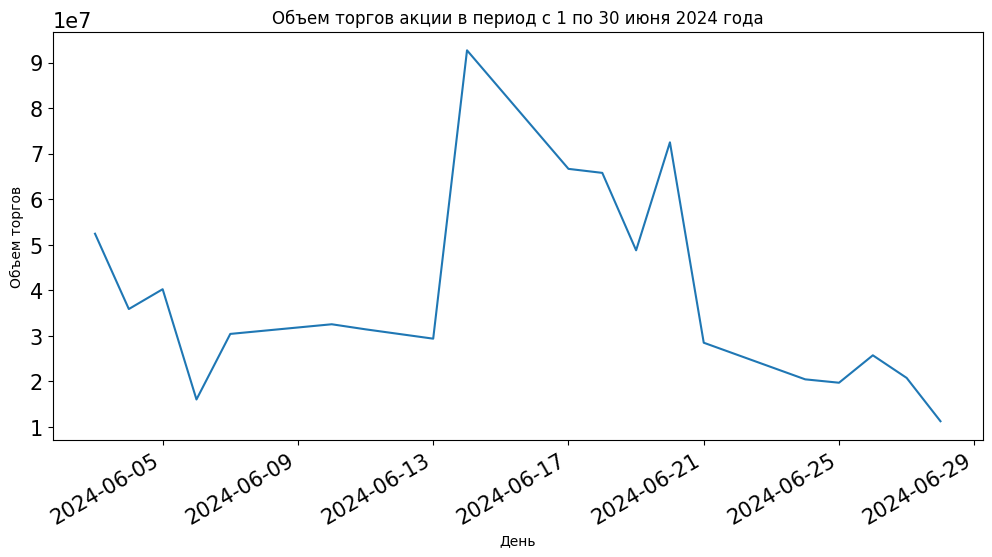

In [91]:
# изменим размер графика, уберем легенду и добавим подписи
ax = df_aflt_06['VOLUME'].plot(figsize = (12,6), legend = None)
ax.set(title = 'Объем торгов акции в период с 1 по 30 июня 2024 года', xlabel = 'День', ylabel = 'Объем торгов')

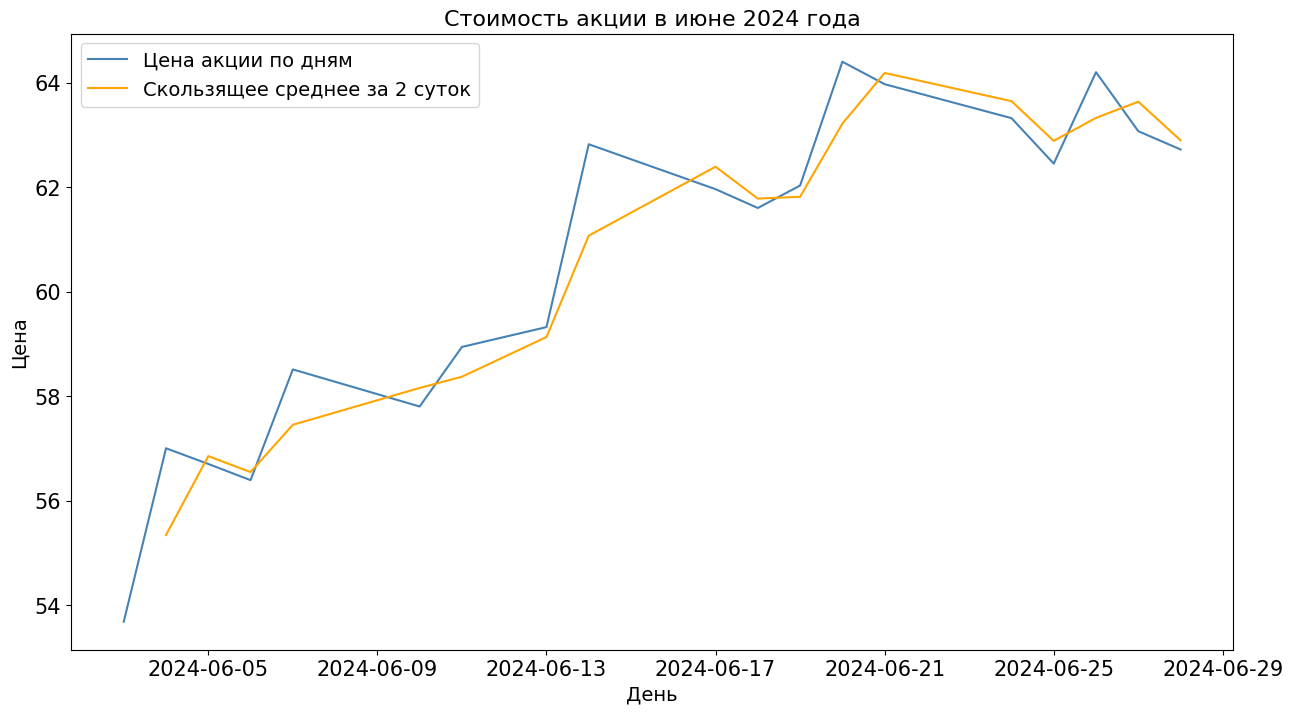

In [92]:
# зададим размер графика
plt.figure(figsize = (15,8))
 
# поочередно зададим кривые (цены и скользящее среднее) с подписями и цветом
plt.plot(df_aflt_06['CLOSE'], label = 'Цена акции по дням ', color = 'steelblue')
plt.plot(df_aflt_06['CLOSE'].rolling(window = 2).mean(), label = 'Скользящее среднее за 2 суток', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('День', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.title('Стоимость акции в июне 2024 года', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

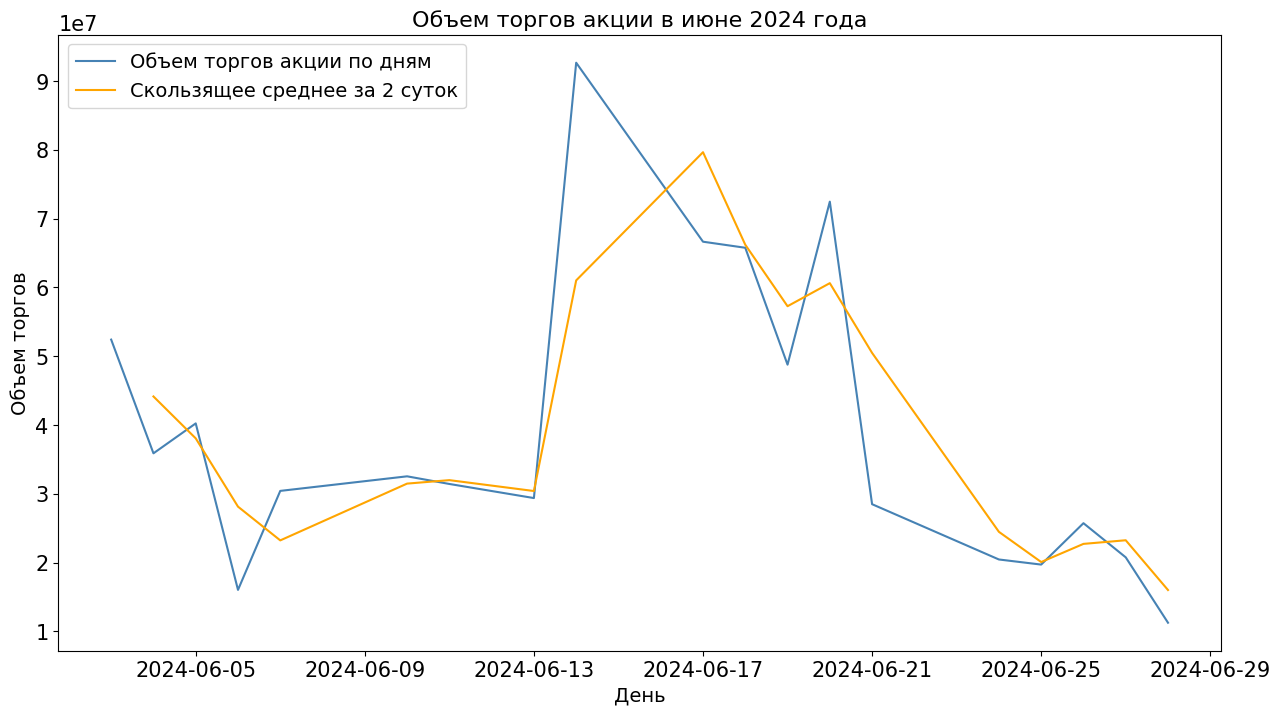

In [93]:
# зададим размер графика
plt.figure(figsize = (15,8))
 
# поочередно зададим кривые (цены и скользящее среднее) с подписями и цветом
plt.plot(df_aflt_06['VOLUME'], label = 'Объем торгов акции по дням', color = 'steelblue')
plt.plot(df_aflt_06['VOLUME'].rolling(window = 2).mean(), label = 'Скользящее среднее за 2 суток', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.xlabel('День', fontsize = 14)
plt.ylabel('Объем торгов', fontsize = 14)
plt.title('Объем торгов акции в июне 2024 года', fontsize = 16)
 
# выведем обе кривые на одном графике
plt.show()

Вывод: Как мы видим, скользящее среднее сглаживает показатели. Также обратите внимание, что так как в данном случае мы взяли окно равное двум суткам, то первое значение скользящего среднего мы получили только за 4 июня 2024 года (самое начало желтой кривой на графике).

Далее разложим наш временной ряд на компоненты.

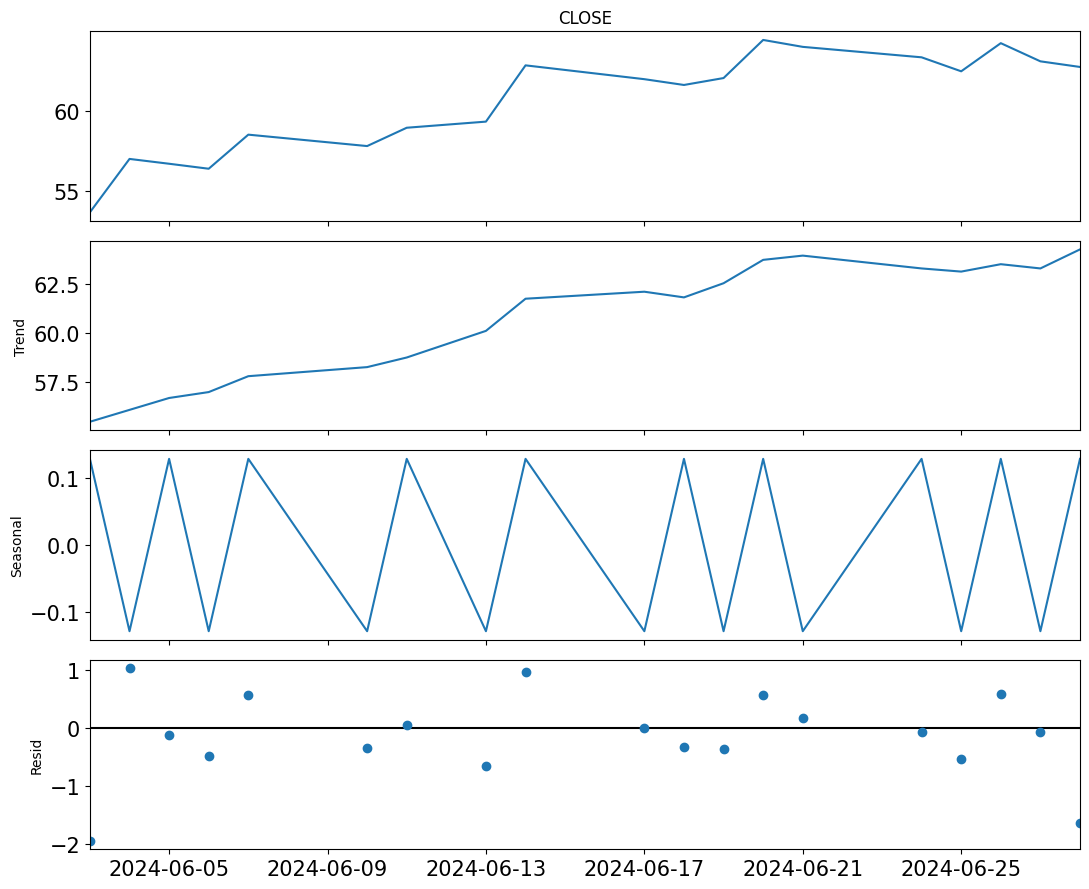

In [94]:
# задаем размер графика
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о стоимости
decompose = seasonal_decompose(x=df_aflt_06['CLOSE'], model='additive', extrapolate_trend='freq', period=2)
decompose.plot()
 
plt.show()

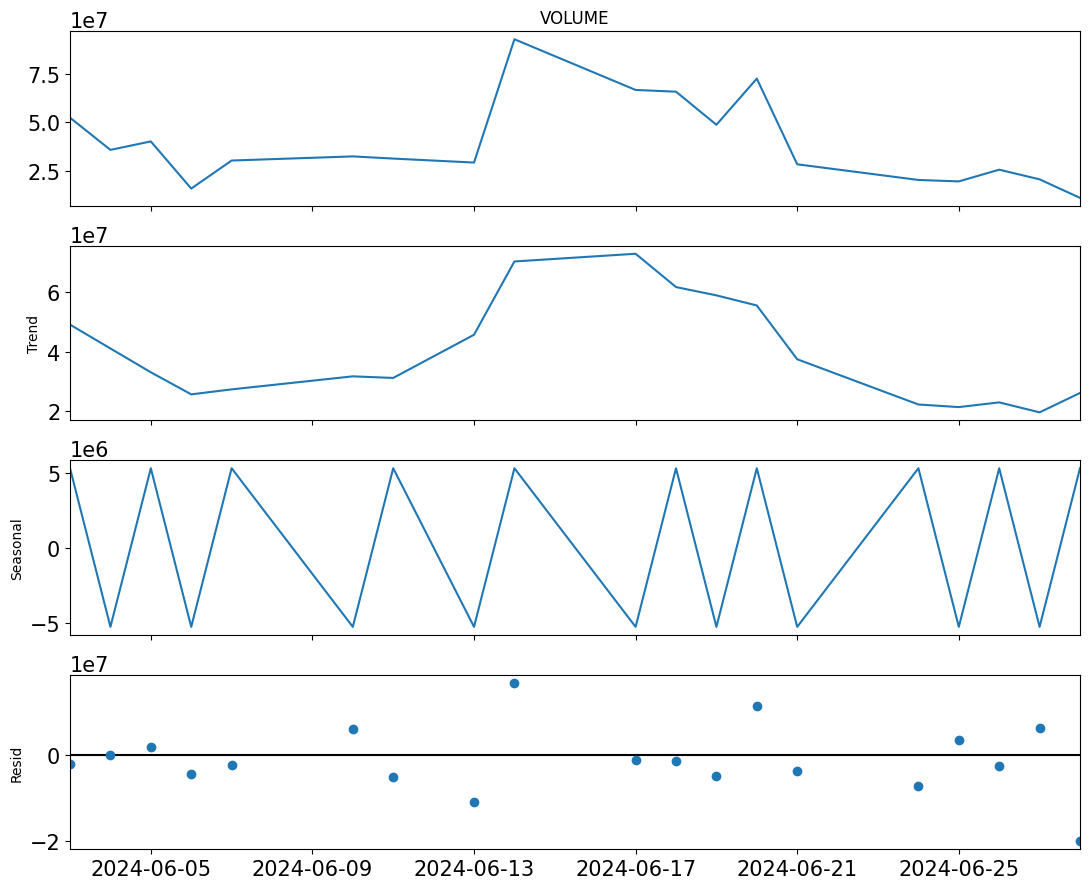

In [299]:
# задаем размер графика
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о стоимости
decompose = seasonal_decompose(x=df_aflt_06['VOLUME'], model='additive', extrapolate_trend='freq', period=2)
decompose.plot()
 
plt.show()

Вывод: Как можно увидеть, по исходному ряду был получен тренд, выявлена некоторая сезонность и шум.

СТАТИСТИЧЕСКИЕ ТЕСТЫ НА PYTHON

Одним из наиболее распространённых тестов на проверку временного ряда на стационарность является расширенный тест Дики — Фуллера. В тесте формулируется две гипотезы:

нулевая гипотеза (H0): временной ряд нестационарный, то есть имеет некоторый тренд и сезонную компоненту;
альтернативная гипотеза (H1): временной ряд стационарный, то есть не имеет тренда и сезонной компоненты, и данные скорее случайны.
В результате проведения теста мы получим несколько значений: значение статистики из теста и критические значения разных уровней значимости (1 %, 5 %, 10 %). Уровень значимости означает допустимую  для данной задачи вероятность ошибки, то есть чем ниже уровень значимости, тем ниже вероятность ошибочного результата теста.

Если значение статистики ниже критического значения выбранного уровня значимости, отвергаем гипотезу H0 и принимаем гипотезу H1 (ряд стационарный).
Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный).

In [95]:
# передадим ей столбец с данными о стоимости поместим результат в adf_test
adf_test = adfuller(df_aflt_06['CLOSE'])
 
# выведем p-value
print('p-value = ' + str(adf_test[1]))

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")

for key, value in adf_test[4].items():
	print(f"\t{key}: {value:.3f}")

p-value = 0.657484545351759
ADF Statistic: -1.2369902661675949
p-value: 0.657484545351759
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691


In [96]:
# передадим ей столбец с данными об объеме поместим результат в adf_test
adf_test = adfuller(df_aflt_06['VOLUME'])
 
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")

for key, value in adf_test[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -1.9900695094372396
p-value: 0.29094417599132744
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


Вывод: Если значение статистики выше критического значения выбранного уровня значимости, принимаем гипотезу H0 (ряд нестационарный)

Обычно для этого достаточно взять разность рядов. Разность выполняется путём дифференцирования ряда, для этого вычисляется разность между двумя соседними наблюдениями ряда. Если полученная первая разность ряда окажется стационарной, то этот ряд называется интегрированным рядом первого порядка.

Для определения порядка интегрированного ряда необходимо сделать следующее:

Получить новый ряд посредством взятия разности (применяем к необходимому датафрейму):

In [97]:
# для продажи
df_diff_1 = df_aflt_06['CLOSE'].diff().dropna()

In [98]:
# проводим для нового ряда тест на стационарность (например, тест Дики — Фуллера):
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  0.6202005235146195
p-value:  0.9881030972840854
Critical values:  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
ряд нестационарен


In [99]:
df_diff_2 = df_diff_1.diff().dropna()

In [100]:
# проводим для нового ряда тест на стационарность (например, тест Дики — Фуллера):
test2 = adfuller(df_diff_2)
print ('adf: ', test2[0])
print ('p-value: ', test2[1])
print ('Critical values: ', test2[4])
if test2[0]> test2[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -3.290871576572033
p-value:  0.015291478948306835
Critical values:  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
ряд стационарен


Вывод: После двукратного дифференцирования результат окажется стационарным временным рядом, то исходный временной ряд будет называться интегрированным рядом второго порядка

In [101]:
# для объема
df_diff_v_1 = df_aflt_06['VOLUME'].diff().dropna()

In [102]:
# проводим для нового ряда тест на стационарность (например, тест Дики — Фуллера):
test1 = adfuller(df_diff_v_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -5.885731103379006
p-value:  3.0048144487475766e-07
Critical values:  {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
ряд стационарен


Вывод: После однократного дифференцирования результат окажется стационарным временным рядом, то исходный временной ряд будет называться интегрированным рядом первого порядка

Автокорреляция — это статистическая взаимосвязь между последовательностями значений одного временного ряда, взятыми со сдвигом. Другими словами, автокорреляция говорит нам о том, насколько значение во временном ряду похоже на предыдущее значение.

Таким образом, автокорреляция — это корреляция ряда с самим собой (отсюда приставка «авто»), но со сдвигом во времени. Она помогает выявлять тенденции в данных и оценивать влияние ранее наблюдаемых значений на текущее наблюдение.

Лаг — это предыдущее наблюдение (например, лаг в шесть дней относительно сегодняшнего дня указывает на значение чего-либо, полученное шесть дней назад).
Положительная корреляция — это отношение, при котором увеличение одного значения предсказывает увеличение другого.
Отрицательная корреляция — это отношение, при котором увеличение одного значения предсказывает уменьшение другого.
Доверительный интервал — это рассчитанный диапазон значений, в котором, вероятно, будет содержаться неизвестное (предсказанное) значение для наших данных.
Уровень достоверности — это вероятность того, что доверительный интервал будет содержать наблюдаемое значение (фактическое значение для предсказания).

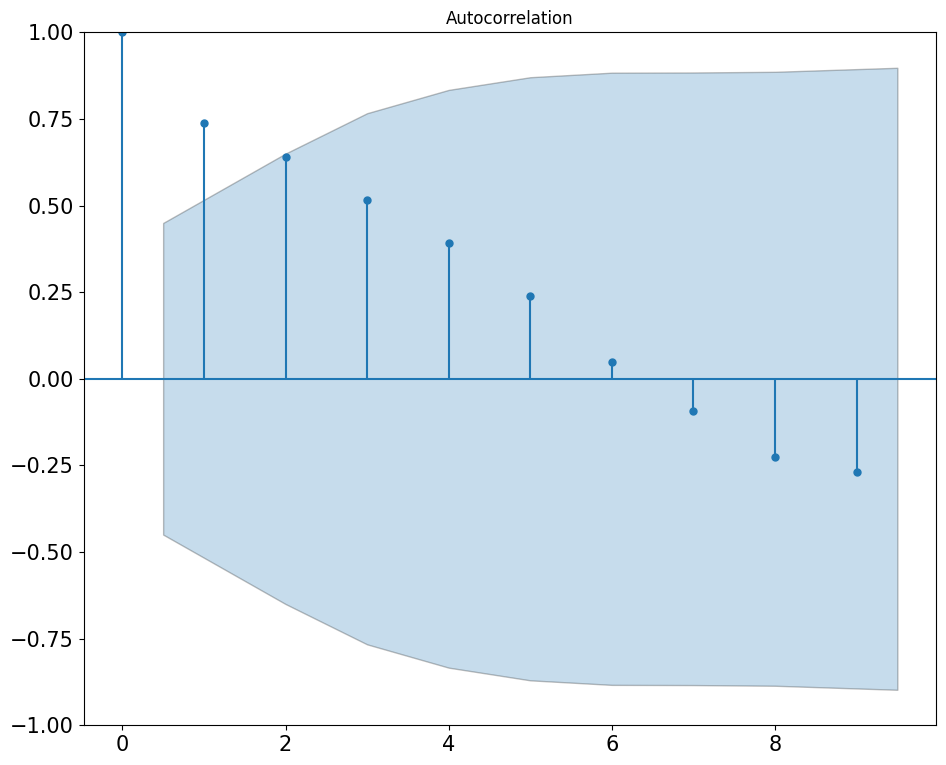

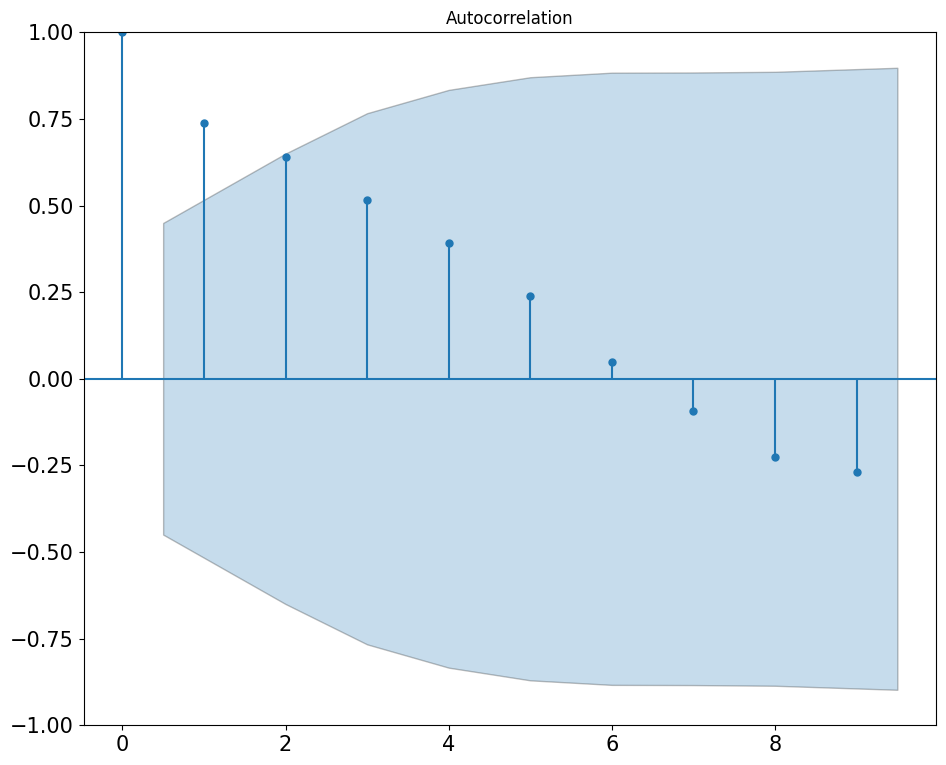

In [103]:
df_c = df_aflt_06['CLOSE']
plot_acf(df_c)


Вывод: Присутствует явно выраженный тренд. Все  лаги имеют выраженную корреляцию.

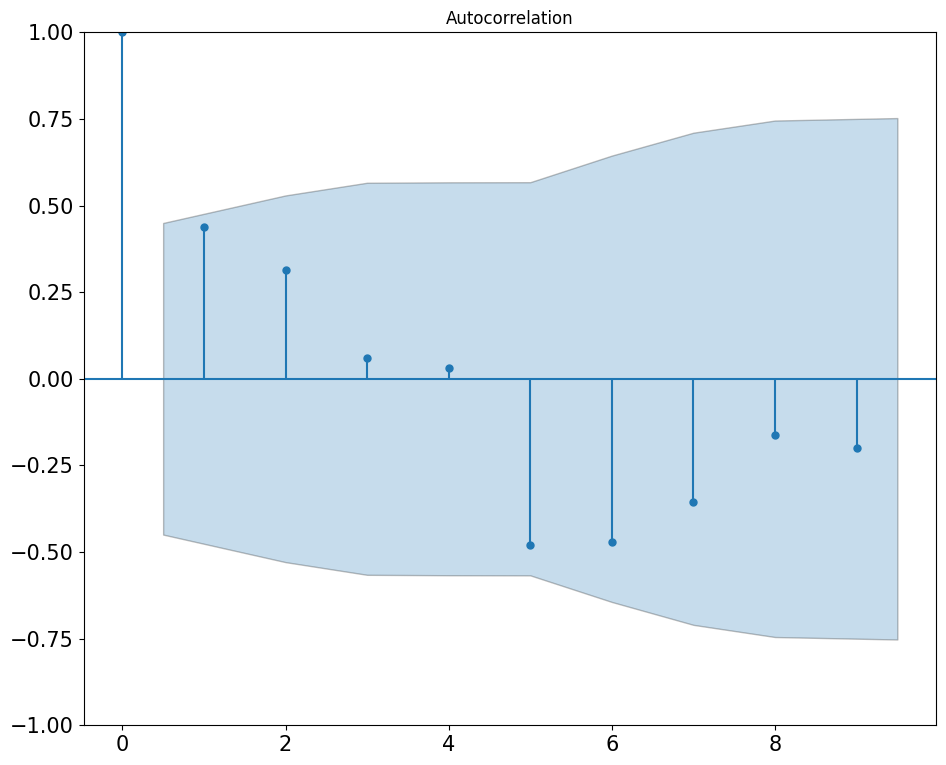

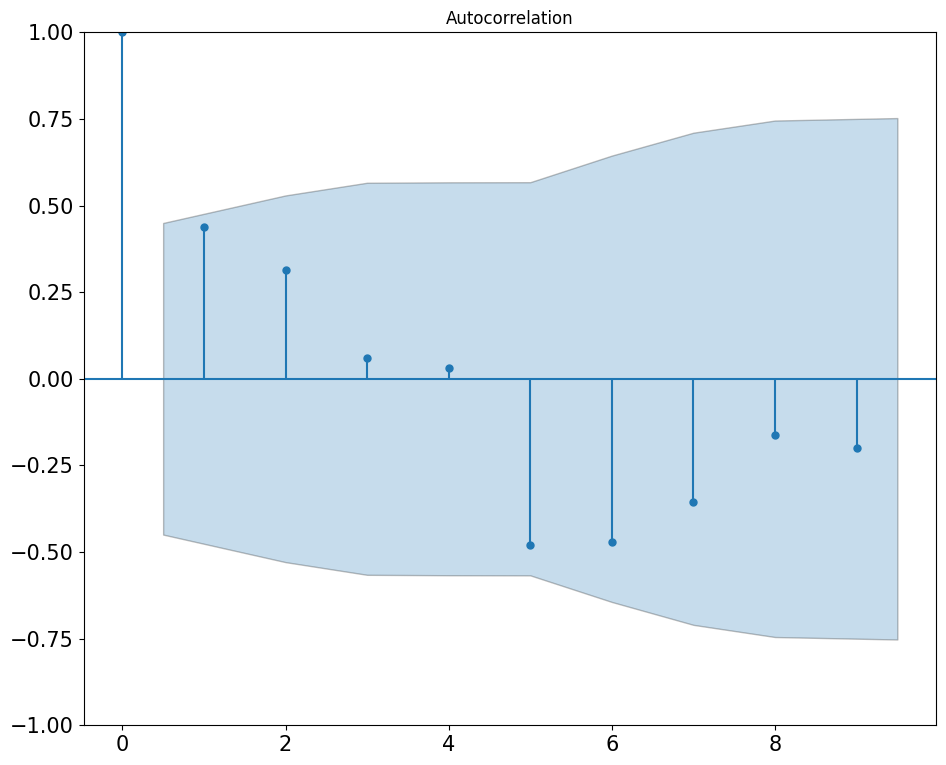

In [104]:
df_v = df_aflt_06['VOLUME']
plot_acf(df_v)

Вывод: Лаги с 1 по 4 и с 5 по 9 имеют выраженную корреляцию.

##### <span style="color:blue">Краткие выводы и действия:</span>
Автокорреляция позволяет выявлять тренд и сезонность, а также используется при подборе параметров моделей. В частности, мы видим, что некоторые лаги сильнее коррелирует с исходным рядом, чем другие соседние. Такая автокорреляция позволяет предположить наличие сезонных колебаний.

То, что корреляция положительная и отрицательная свидетельствует об отсутствии тренда. Все это согласуется с тем, что мы узнали о данных, когда раскладывали их на компоненты.

Также замечу, что синяя граница позволяет оценить статистическую значимость корреляции. Если столбец выходит за ее пределы, то автокорреляция достаточно сильна и ее можно использовать при построении модели.

[Оглавление ⬆️](#item-zero)

#### 3.1.4. Обработка целевой переменной - "CLOSE" <a id="item-three-one-four"></a>

In [105]:
data_close = df_aflt.copy()

In [106]:
# выводим информацию для анализа
display(f"Количество пропусков в признаке close = {data_close.CLOSE.isnull().sum()}")
display(f"Количество уникальных значений в признаке close = {data_close.CLOSE.nunique()}")

'Количество пропусков в признаке close = 18'

'Количество уникальных значений в признаке close = 2135'

In [107]:
# удаляем пропуски в случае наличия
data_close.dropna(subset=["CLOSE"], inplace=True)

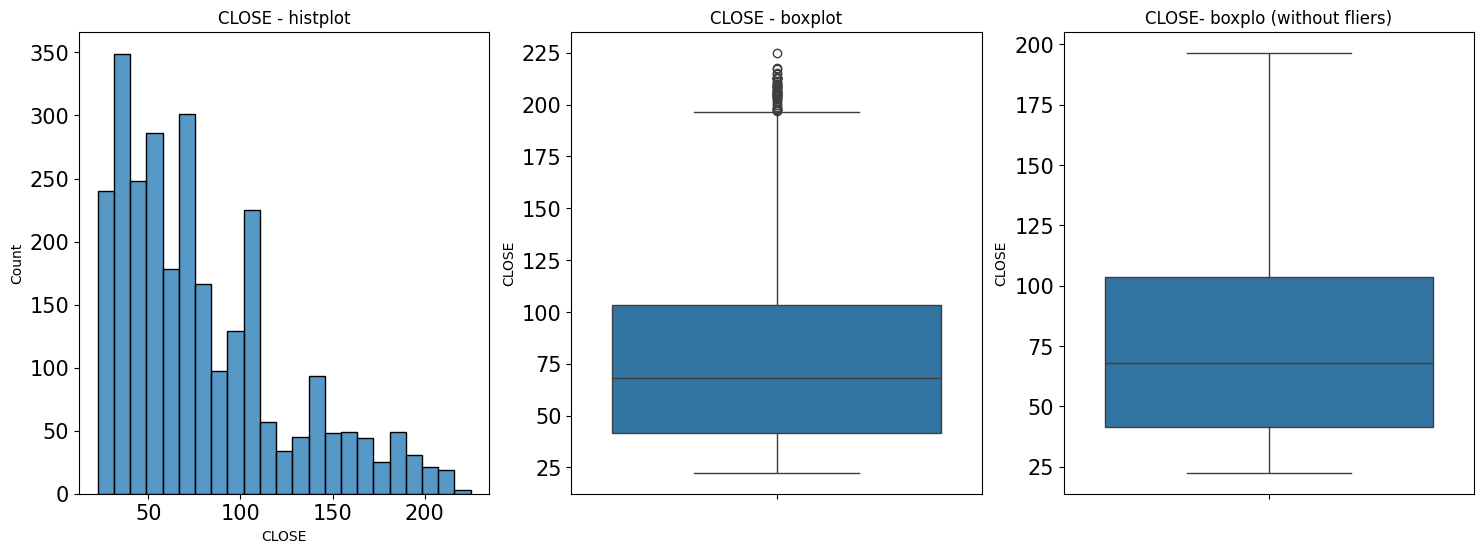

In [108]:
# строим гистограмму и коробчатую диаграмму для визуальной оценки признакa
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
hisplot = sns.histplot(data=data_close, x="CLOSE", ax=axes[0]);
hisplot.set_title("CLOSE - histplot");
boxplot = sns.boxplot(data=data_close, y="CLOSE", ax=axes[1]);
boxplot.set_title("CLOSE - boxplot")
boxplot = sns.boxplot(data=data_close, y="CLOSE", ax=axes[2], showfliers=False);
boxplot.set_title("CLOSE- boxplo (without fliers)")
plt.show()

[Оглавление ⬆️](#item-zero)

### 3.2 Проектирование признаков <a id="item-three-two"></a>

#### 3.2.1 Создание признаков из существующего набора данных<a id="item-three-two-one"></a>

[Оглавление ⬆️](#item-zero)

##### *3.2.1.1 Разбор даты и времени* <a id="item-three-two-one-one"></a>

In [180]:
# при обработке признаков данная операция была выполнена

[Оглавление ⬆️](#item-zero)

##### *3.2.1.2 Разбор числовых признаков* <a id="item-three-two-one-two"></a>

In [181]:
# при обработке признаков данная операция была выполнена

[Оглавление ⬆️](#item-zero)

##### *3.2.1.3 Разбор текста* <a id="item-three-two-one-three"></a>

In [182]:
# при обработке признаков данная операция была выполнена

[Оглавление ⬆️](#item-zero)

#### 3.2.2 Преобразование признаков <a id="item-three-two-two"></a>

In [189]:
# при анализе и обработке признаков данная операция была выполнена

[Оглавление ⬆️](#item-zero)

### 3.3. Отбор признаков <a id="item-three-three"></a>

**Feature Selection** - это процесс выбора подмножества наиболее важных признаков или переменных из общих признаков уровня набора данных для построения алгоритмов обучения машин с целью:
* лучшее понимание данных: относительные оценки могут указать, какие функции могут быть наиболее релевантными для цели, и, наоборот, какие наименее релевантны. Это может быть интерпретировано экспертом в предметной области и использовано в качестве основы для сбора большего количества или других данных;
* лучшее понимание модели: расчет коэффициентов важности дает представление о конкретной модели и о том, какие столбцы являются наиболее и наименее важными при прогнозировании.
* уменьшение количества входных признаков: используя оценки важности, чтобы выбрать те функции, которые нужно удалить (обладатели самых низких оценок). Это может упростить моделирование, ускорить процесс и, в некоторых случаях, повысить производительность модели.

In [109]:
# загружаем данные
# сразу превратим дату в индекс и преобразуем ее в объект datetime
df_aflt = pd.read_csv('AFLT.csv', index_col = 'TRADEDATE', parse_dates = True)
df_aflt.head(3)


,CLOSE,VOLUME
TRADEDATE,,
2013-10-31,57.400,2779400
2013-11-01,57.380,2286300
2013-11-05,56.850,729000


In [111]:
# c учетом неопределенности, а также фундаментального анализа фондового рынка,
# предлагается рассмотреть период года, в связи с чем сделаем срез за определенный период, 
# например, с 6 октября 2023 года по 5 октября 2024 года.
df_aflt_years = df_aflt['2023-10-06':'2024-10-05']
# df_aflt_years

**Для оценки производительности моделей машинного обучения определим следующие метрики:**

* **RMSE (Root Mean Square Error)** - корень из среднеквадратической ошибки. Эта метрика измеряет среднеквадратичное отклонение прогнозируемых значений от фактических значений. RMSE штрафует большие ошибки сильнее, чем меньшие, так как ошибка возводится в квадрат перед усреднением. Формула: $$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$ где $y_i$ - истинные значения, $\hat{y}_i$ - прогнозируемые значения, и $n$ - количество наблюдений;

* **MAE (Mean Absolute Error)** - cредняя абсолютная ошибка. Это среднее значение абсолютных разностей между прогнозируемыми и фактическими значениями. MAE не штрафует большие ошибки так сильно, как RMSE. Формула: $$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$ где $y_i$ - истинные значения, $\hat{y}_i$ - прогнозируемые значения, и $n$ - количество наблюдений;

* **MAPE (Mean Absolute Percentage Error)** - cредняя абсолютная процентная ошибка. Эта метрика выражает ошибку в процентах от истинных значений и может быть полезна для сравнения точности прогнозов между разными наборами данных. Формула: $$ MAPE = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| $$ где $y_i$ - истинные значения, $\hat{y}_i$ - прогнозируемые значения, и $n$ - количество наблюдений.

[Оглавление ⬆️](#item-zero)

### 3.4. Вычисление процентного изменения цены со временем и выполнение агрегированных расчетов в пределах скользящего временного окна. <a id="item-three-four"></a>

In [1]:
ticker = 'TSLA'
tkr = yf.Ticker(ticker)
df = tkr.history(period='1y')

Результат представлен в формате pandas DataFrame и выглядит примерно
следующим образом: 

In [2]:
# выводим информацию о размерности и табличной структуре данных (голова - хвост)
print("Размер данных: {}".format(df.shape))
display(df.head(3))
display(df.tail(1))

Размер данных: (252, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-12 00:00:00-04:00,262.920013,265.410004,256.630005,258.869995,111508100,0.0,0.0
2023-10-13 00:00:00-04:00,258.899994,259.600006,250.220001,251.119995,102073800,0.0,0.0
2023-10-16 00:00:00-04:00,250.050003,255.399994,248.479996,253.919998,88917200,0.0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-11 00:00:00-04:00,220.130005,223.339996,214.380005,217.800003,142287000,0.0,0.0


Вывод: Датафрейм индексируется по дате. Это означает, что данные представляют собой полноценный, хронологически упорядоченный временной ряд.
Есть колонки с ценой открытия и закрытия, а также с самой высокой и низкой
ценой за день. В свою очередь, колонка Volume показывает общее количество
акций, участвующих в торгах в этот день, а две крайние правые колонки содержат подробную информацию о дивидендах и сплитах, которые компания
выплатила своим акционерам.

In [3]:
# выводим стоимость закрытия
print(df['Close']) 

Date
2023-10-12 00:00:00-04:00    258.869995
2023-10-13 00:00:00-04:00    251.119995
2023-10-16 00:00:00-04:00    253.919998
2023-10-17 00:00:00-04:00    254.850006
2023-10-18 00:00:00-04:00    242.679993
                                ...    
2024-10-07 00:00:00-04:00    240.830002
2024-10-08 00:00:00-04:00    244.500000
2024-10-09 00:00:00-04:00    241.050003
2024-10-10 00:00:00-04:00    238.770004
2024-10-11 00:00:00-04:00    217.800003
Name: Close, Length: 252, dtype: float64


Разберем два самых
распространенных метода:
вычисление процентного изменения цены со временем и выполнение агрегированных расчетов в пределах скользящего временного окна.

## 3.4.1. Вычисление процентного изменения цены со временем<a id="item-three-four-one"></a>

Наиболее типичный метод анализа временных рядов — отслеживание
того, насколько сильно изменяются наблюдаемые данные с течением времени.
Если речь идет о данных фондового рынка, этот метод анализа, вероятно, подразумевает расчет процентного изменения стоимости акций за определенный
промежуток времени. Таким образом, можно количественно оценить динамику
стоимости акций и разработать краткосрочную инвестиционную стратегию.
С технической точки зрения процентное изменение — это разница (выраженная
в процентах) между значениями, полученными в два разных момента времени,
поэтому для расчета такого изменения необходимо иметь возможность сдвигать
точки данных во времени. Это означает — сдвинуть имеющуюся точку данных
вперед во времени так, чтобы она совпала с новой точкой данных, затем сравнить
эти точки данных и рассчитать процентное изменение.
Когда временной ряд реализован в виде pandas Series или DataFrame, можно
использовать метод shift() для сдвига точек данных во времени на нужное количество периодов. С целью изменения цены закрытия за два дня, будем использовать shift(2), чтобы сдвинуть цену закрытия, которая была зафиксирована двумя днями ранее, вперед до цены закрытия на данный день. Чтобы
понять, как работает сдвиг, сдвинем столбец Close на два дня вперед, сохраним
результат как серию 2DaysShift и объединим ее с исходным столбцом Close: 

In [6]:
print(pd.concat([df['Close'], df['Close'].shift(2)], axis=1, keys= ['Close',
'2DaysShift'])) 

                                Close  2DaysShift
Date                                             
2023-10-12 00:00:00-04:00  258.869995         NaN
2023-10-13 00:00:00-04:00  251.119995         NaN
2023-10-16 00:00:00-04:00  253.919998  258.869995
2023-10-17 00:00:00-04:00  254.850006  251.119995
2023-10-18 00:00:00-04:00  242.679993  253.919998
2023-10-19 00:00:00-04:00  220.110001  254.850006
2023-10-20 00:00:00-04:00  211.990005  242.679993
2023-10-23 00:00:00-04:00  212.080002  220.110001
2023-10-24 00:00:00-04:00  216.520004  211.990005
2023-10-25 00:00:00-04:00  212.419998  212.080002
2023-10-26 00:00:00-04:00  205.759995  216.520004
2023-10-27 00:00:00-04:00  207.300003  212.419998
2023-10-30 00:00:00-04:00  197.360001  205.759995
2023-10-31 00:00:00-04:00  200.839996  207.300003
2023-11-01 00:00:00-04:00  205.660004  197.360001
2023-11-02 00:00:00-04:00  218.509995  200.839996
2023-11-03 00:00:00-04:00  219.960007  205.660004
2023-11-06 00:00:00-05:00  219.270004  218.509995


Как видим, значения в колонке Close находят отражение в колонке 2DaysShift,
но со смещением в два дня. Первые два значения в колонке 2DaysShift пустые
(NaN), потому что цен за дни, предшествующие первым двум значениям временного ряда, у нас нет.
Чтобы найти процентное изменение цены за двухдневный период, можно взять
разницу между стоимостью акции в данный день и ценой, которая была зафиксирована два дня назад, и разделить эту разницу на второе значение: 

In [7]:
(df['Close'] - df['Close'].shift(2))/ df['Close'].shift(2) 

Date
2023-10-12 00:00:00-04:00         NaN
2023-10-13 00:00:00-04:00         NaN
2023-10-16 00:00:00-04:00   -0.019122
2023-10-17 00:00:00-04:00    0.014854
2023-10-18 00:00:00-04:00   -0.044266
2023-10-19 00:00:00-04:00   -0.136315
2023-10-20 00:00:00-04:00   -0.126463
2023-10-23 00:00:00-04:00   -0.036482
2023-10-24 00:00:00-04:00    0.021369
2023-10-25 00:00:00-04:00    0.001603
2023-10-26 00:00:00-04:00   -0.049695
2023-10-27 00:00:00-04:00   -0.024103
2023-10-30 00:00:00-04:00   -0.040824
2023-10-31 00:00:00-04:00   -0.031163
2023-11-01 00:00:00-04:00    0.042055
2023-11-02 00:00:00-04:00    0.087980
2023-11-03 00:00:00-04:00    0.069532
2023-11-06 00:00:00-05:00    0.003478
2023-11-07 00:00:00-05:00    0.010093
2023-11-08 00:00:00-05:00    0.012952
2023-11-09 00:00:00-05:00   -0.054910
2023-11-10 00:00:00-05:00   -0.033587
2023-11-13 00:00:00-05:00    0.065387
2023-11-14 00:00:00-05:00    0.106033
2023-11-15 00:00:00-05:00    0.085512
2023-11-16 00:00:00-05:00   -0.016090
2023-11

Однако в финансовом анализе принято делить новое значение на старое
и брать натуральный логарифм получившегося значения. Этот расчет обеспечивает почти точное приближение процентного изменения, когда оно
находится в диапазоне от +/–5 до +/–20%. Во фрагменте кода ниже мы
рассчитываем двухдневную разницу в процентах, используя натуральный
логарифм, и сохраняем результат в виде нового столбца 2daysRise в датафрейме df: 

In [10]:
df['2daysRise'] = np.log(df['Close'] / df['Close'].shift(2)) 
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,2daysRise
Date,,,,,,,,
2023-10-12 00:00:00-04:00,262.920013,265.410004,256.630005,258.869995,111508100,0.0,0.0,NaN
2023-10-13 00:00:00-04:00,258.899994,259.600006,250.220001,251.119995,102073800,0.0,0.0,NaN
2023-10-16 00:00:00-04:00,250.050003,255.399994,248.479996,253.919998,88917200,0.0,0.0,-0.019307
2023-10-17 00:00:00-04:00,250.100006,257.179993,247.080002,254.850006,93562900,0.0,0.0,0.014744
2023-10-18 00:00:00-04:00,252.699997,254.630005,242.080002,242.679993,125147800,0.0,0.0,-0.045276


Цену закрытия в текущий день делим на цену закрытия двумя биржевыми днями ранее, используя shift(2). Затем используем функцию
NumPy log(), чтобы вычислить натуральный логарифм полученного значения.
Теперь выводим на экран колонки Close и 2daysRise:

In [11]:
print(df[['Close','2daysRise']]) 

                                Close  2daysRise
Date                                            
2023-10-12 00:00:00-04:00  258.869995        NaN
2023-10-13 00:00:00-04:00  251.119995        NaN
2023-10-16 00:00:00-04:00  253.919998  -0.019307
2023-10-17 00:00:00-04:00  254.850006   0.014744
2023-10-18 00:00:00-04:00  242.679993  -0.045276
2023-10-19 00:00:00-04:00  220.110001  -0.146548
2023-10-20 00:00:00-04:00  211.990005  -0.135205
2023-10-23 00:00:00-04:00  212.080002  -0.037164
2023-10-24 00:00:00-04:00  216.520004   0.021144
2023-10-25 00:00:00-04:00  212.419998   0.001602
2023-10-26 00:00:00-04:00  205.759995  -0.050973
2023-10-27 00:00:00-04:00  207.300003  -0.024398
2023-10-30 00:00:00-04:00  197.360001  -0.041681
2023-10-31 00:00:00-04:00  200.839996  -0.031658
2023-11-01 00:00:00-04:00  205.660004   0.041195
2023-11-02 00:00:00-04:00  218.509995   0.084323
2023-11-03 00:00:00-04:00  219.960007   0.067221
2023-11-06 00:00:00-05:00  219.270004   0.003472
2023-11-07 00:00:00-

Вывод: Колонка 2daysRise показывает процентное изменение цены акции по сравнению с ее стоимостью двумя днями ранее. И снова первые два значения в столбце — NaN, потому что цен за два предыдущих дня для первых двух значений временного ряда у нас нет.

[Оглавление ⬆️](#item-zero)

## 3.4.2. Вычисление скользящего окна <a id="item-three-four-two"></a>

Другой популярный метод анализа временных рядов — сравнение каждого
значения со средним значением за n периодов. Это называется вычислением
скользящего окна (rolling window calculation): мы создаем временное окно фиксированного размера и выполняем агрегированный расчет значений в пределах
этого окна по мере его перемещения, или скольжения, по временному ряду.
В случае с акциями можно использовать скользящее окно, чтобы найти среднюю цену закрытия двух предыдущих дней, а затем сравнить цену закрытия
текущего дня с этим значением. Это даст представление о стабильности цены
акций с течением времени.
Каждый объект pandas имеет метод rolling() для просмотра скользящего окна
значений. Используем его в сочетании с shift() и mean() для нахождения средней цены акций Tesla за предыдущие два дня: 

В первой строке применяем shift(1) для сдвига точек данных в серии на один
день назад, поскольку не хотим включать цену текущего дня в расчет среднего
значения. Далее формируем скользящее окно с помощью функции rolling(2),
которая для выполнения вычислений берет две последовательные строки. Наконец, вызываем метод mean() для расчета среднего значения для каждой пары
последовательных строк в скользящем окне. Сохраняем результаты в новом
столбце 2daysAvg, который выводим на экран вместе со столбцом Close. Итоговый датафрейм будет выглядеть так:

In [12]:
df['2daysAvg'] = df['Close'].shift(1).rolling(2).mean()
print(df[['Close', '2daysAvg']])

                                Close    2daysAvg
Date                                             
2023-10-12 00:00:00-04:00  258.869995         NaN
2023-10-13 00:00:00-04:00  251.119995         NaN
2023-10-16 00:00:00-04:00  253.919998  254.994995
2023-10-17 00:00:00-04:00  254.850006  252.519997
2023-10-18 00:00:00-04:00  242.679993  254.385002
2023-10-19 00:00:00-04:00  220.110001  248.764999
2023-10-20 00:00:00-04:00  211.990005  231.394997
2023-10-23 00:00:00-04:00  212.080002  216.050003
2023-10-24 00:00:00-04:00  216.520004  212.035004
2023-10-25 00:00:00-04:00  212.419998  214.300003
2023-10-26 00:00:00-04:00  205.759995  214.470001
2023-10-27 00:00:00-04:00  207.300003  209.089996
2023-10-30 00:00:00-04:00  197.360001  206.529999
2023-10-31 00:00:00-04:00  200.839996  202.330002
2023-11-01 00:00:00-04:00  205.660004  199.099998
2023-11-02 00:00:00-04:00  218.509995  203.250000
2023-11-03 00:00:00-04:00  219.960007  212.084999
2023-11-06 00:00:00-05:00  219.270004  219.235001


Цены в колонке 2daysAvg являются средними значениями двух предыдущих
биржевых дней.

Вычисление процентного изменения скользящего среднего

Следующий логический шаг — расчет разницы в процентах между ценой каждого текущего дня и соответствующей средней ценой двух предшествующих
дней, вычисленной с помощью скользящего окна. Выполняем этот расчет, снова
используя натуральный логарифм для приближения процентного изменения.

Сохраняем результаты в новом столбце под названием 2daysAvgRise. Затем выводим на экран столбцы Close, 2daysRise и 2daysAvgRise вместе. Вывод будет
приблизительно таким: 

In [13]:
df['2daysAvgRise'] = np.log(df['Close'] / df['2daysAvg'])
print(df[['Close','2daysRise','2daysAvgRise']]) 

                                Close  2daysRise  2daysAvgRise
Date                                                          
2023-10-12 00:00:00-04:00  258.869995        NaN           NaN
2023-10-13 00:00:00-04:00  251.119995        NaN           NaN
2023-10-16 00:00:00-04:00  253.919998  -0.019307     -0.004225
2023-10-17 00:00:00-04:00  254.850006   0.014744      0.009185
2023-10-18 00:00:00-04:00  242.679993  -0.045276     -0.047105
2023-10-19 00:00:00-04:00  220.110001  -0.146548     -0.122381
2023-10-20 00:00:00-04:00  211.990005  -0.135205     -0.087587
2023-10-23 00:00:00-04:00  212.080002  -0.037164     -0.018546
2023-10-24 00:00:00-04:00  216.520004   0.021144      0.020932
2023-10-25 00:00:00-04:00  212.419998   0.001602     -0.008811
2023-10-26 00:00:00-04:00  205.759995  -0.050973     -0.041459
2023-10-27 00:00:00-04:00  207.300003  -0.024398     -0.008598
2023-10-30 00:00:00-04:00  197.360001  -0.041681     -0.045416
2023-10-31 00:00:00-04:00  200.839996  -0.031658     -0

Вывод: Для этого конкретного временного ряда обе вновь созданные метрики, 2daysRise
и 2daysAvgRise, содержат как отрицательные, так и положительные значения.
Это указывает на то, что цена закрытия акции была волатильной в течение всего
периода наблюдения. Конечно, полученные вами результаты могут показать
другую тенденцию.

[Оглавление ⬆️](#item-zero)

## 3.4.3. Многомерные временные ряды <a id="item-three-four-three"></a>

Многомерный временной ряд — это ряд с более чем одной переменной, изменяющейся во времени. Например, когда мы впервые получили данные о стоимости
акции Tesla через библиотеку yfinance, они были представлены в виде многомерного временного ряда, поскольку включали не только цену закрытия на
определенный день, но и цену открытия, самую высокую и самую низкую цену
дня, а также несколько других точек данных. В данном случае многомерный
временной ряд отслеживает несколько характеристик одного итого же объекта —
отдельной акции. Кроме того, многомерные временные ряды могут отслеживать
одну и ту же характеристику нескольких различных объектов, например цену
закрытия нескольких акций за один период времени.

In [14]:
stocks = pd.DataFrame()
tickers = ['MSFT','TSLA','GM','AAPL','ORCL','AMZN']
for ticker in tickers:
    tkr = yf.Ticker(ticker)
    hist = tkr.history(period='10y')
    hist = pd.DataFrame(hist[['Close']].rename(columns={'Close': ticker}))
    if stocks.empty:
        stocks = hist
    else:
        stocks = stocks.join(hist)

Итоговый датафрейм stocks:

In [15]:
# выводим информацию о размерности и табличной структуре данных (голова - хвост)
print("Размер данных: {}".format(stocks.shape))
display(stocks.head(5))
display(stocks.tail(5))

Размер данных: (2517, 6)


,MSFT,TSLA,GM,AAPL,ORCL,AMZN
Date,,,,,,
2014-10-13 00:00:00-04:00,37.321579,14.972667,23.084667,22.155504,32.733879,15.3225
2014-10-14 00:00:00-04:00,37.389969,15.137333,23.332638,21.920208,32.930809,15.4155
2014-10-15 00:00:00-04:00,36.953941,15.313333,23.007170,21.651617,32.793812,15.2985
2014-10-16 00:00:00-04:00,36.543510,15.090000,23.200903,21.367483,32.160198,15.1430
2014-10-17 00:00:00-04:00,37.304470,15.165333,23.433376,21.680473,32.425636,15.1820


,MSFT,TSLA,GM,AAPL,ORCL,AMZN
Date,,,,,,
2024-10-07 00:00:00-04:00,409.540009,240.830002,45.980000,221.690002,169.588669,180.800003
2024-10-08 00:00:00-04:00,414.709991,244.500000,46.009998,225.770004,173.978790,182.720001
2024-10-09 00:00:00-04:00,417.459991,241.050003,47.930000,229.539993,177.889999,185.169998
2024-10-10 00:00:00-04:00,415.839996,238.770004,47.689999,229.039993,175.410004,186.649994
2024-10-11 00:00:00-04:00,416.320007,217.800003,47.869999,227.550003,175.770004,188.820007


Мы получили многомерный временной ряд. В столбцах этого набора данных
отображены цены закрытия различных акций, в строках — единый промежуток
времени.

Обработка многомерных временных рядов напоминает работу с одномерными
временными рядами, за исключением того, что в первом случае придется иметь
дело с несколькими переменными в каждой строке. Поэтому вычисления часто
производятся внутри цикла, перебирающего столбцы серии. Предположим,
что требуется отфильтровать датафрейм stocks, удалив тикеры, цены которых
упали более чем на 10% по сравнению с ценой предыдущего дня хотя бы один раз
за указанный период. Во фрагменте кода ниже мы перебираем столбцы и анализируем данные по каждому тикеру, чтобы определить, какие акции следует
сохранить в датафрейме: 

In [16]:
stocks_to_keep = []
for i in stocks.columns:
    if stocks[stocks[i]/stocks[i].shift(1)< .85].empty:
        stocks_to_keep.append(i)
print(stocks_to_keep)

['MSFT', 'AAPL', 'ORCL', 'AMZN']


Как видим, TSLA и GM отсутствуют в списке, потому что они содержат одно
или несколько значений, которые более чем на 3% ниже цены закрытия в предыдущий день. Мы выводим на экран датафрейм stocks, фильтруя его таким образом, чтобы
он включал только столбцы из списка stocks_to_keep: 

In [17]:
print(stocks[stocks_to_keep])

                                 MSFT        AAPL        ORCL        AMZN
Date                                                                     
2014-10-13 00:00:00-04:00   37.321579   22.155504   32.733879   15.322500
2014-10-14 00:00:00-04:00   37.389969   21.920208   32.930809   15.415500
2014-10-15 00:00:00-04:00   36.953941   21.651617   32.793812   15.298500
2014-10-16 00:00:00-04:00   36.543510   21.367483   32.160198   15.143000
2014-10-17 00:00:00-04:00   37.304470   21.680473   32.425636   15.182000
...                               ...         ...         ...         ...
2024-10-07 00:00:00-04:00  409.540009  221.690002  169.588669  180.800003
2024-10-08 00:00:00-04:00  414.709991  225.770004  173.978790  182.720001
2024-10-09 00:00:00-04:00  417.459991  229.539993  177.889999  185.169998
2024-10-10 00:00:00-04:00  415.839996  229.039993  175.410004  186.649994
2024-10-11 00:00:00-04:00  416.320007  227.550003  175.770004  188.820007

[2517 rows x 4 columns]


Как и ожидалось, столбцы TSLA и MSFT удалены, поскольку они содержат одно
или несколько значений, превышающих 3-процентный порог волатильности.
Анализ зависимости между переменными
Одной из распространенных задач при анализе многомерных временных рядов
является выявление взаимосвязей между переменными. Зависимости между ценами закрытия двух акций из
разных секторов экономики, наоборот, может не быть.
Рассмотрим некоторые методы проверки существования взаимосвязи между переменными временного ряда. Для примера проверим, существует ли зависимость между изменением цены акции иобъемом ее продаж. Для начала
запустим следующий скрипт, чтобы получить данные об акциях за один год:

In [18]:
ticker = 'TSLA'
tkr = yf.Ticker(ticker)
df = tkr.history(period='1y')

yfinance создает многомерный временной ряд в виде датафрейма с несколькими столбцами. Выводим
два из них: Close и Volume. Сокращаем датафрейм до нужных колонок и изменяем
название столбца Close на Price: 

In [19]:
df = df[['Close','Volume']].rename(columns={'Close': 'Price'})
df.head()

,Price,Volume
Date,,
2023-10-12 00:00:00-04:00,258.869995,111508100
2023-10-13 00:00:00-04:00,251.119995,102073800
2023-10-16 00:00:00-04:00,253.919998,88917200
2023-10-17 00:00:00-04:00,254.850006,93562900
2023-10-18 00:00:00-04:00,242.679993,125147800


Чтобы определить, существует ли взаимосвязь между столбцами Price и Volume,
необходимо рассчитать процентное изменение в каждом столбце ото дня ко дню.
Рассчитаем ежедневное изменение в столбце Price в процентах, используя
shift(1) и функцию NumPy log(), как мы делали ранее, и сохраним результат
в новом столбце priceRise: 

In [20]:
df['priceRise'] = np.log(df['Price'] / df['Price'].shift(1)) 

Используем ту же технику для создания столбца volumeRise, который будет
отображать процентное изменение объема продаж по сравнению с предыдущим
днем:

In [21]:
df['volumeRise'] = np.log(df['Volume'] / df['Volume'].shift(1))

Натуральный логарифм обеспечивает хорошее приближение процентного изменения в пределах +/–20%. Хотя некоторые значения
в колонке volumeRise вполне могут выйти за пределы этого диапазона. Используем log(), потому что высокая степень точности не требуется; цель анализа фондового рынка — предсказание тенденций,
а не поиск точных значений

In [22]:
# если теперь вывести датафрейм df на экран, то получим следующее:
df.head()

,Price,Volume,priceRise,volumeRise
Date,,,,
2023-10-12 00:00:00-04:00,258.869995,111508100,NaN,NaN
2023-10-13 00:00:00-04:00,251.119995,102073800,-0.030395,-0.088401
2023-10-16 00:00:00-04:00,253.919998,88917200,0.011088,-0.137990
2023-10-17 00:00:00-04:00,254.850006,93562900,0.003656,0.050928
2023-10-18 00:00:00-04:00,242.679993,125147800,-0.048931,0.290862


Если существует зависимость между ценой и объемом продаж, можно ожидать,
что изменение цены выше среднего (то есть рост волатильности) будет коррелировать с изменением объема выше среднего. Чтобы проверить, так ли это, необходимо установить некоторый порог для столбца priceRise и просматривать
только те строки, в которых процентное изменение цены этот порог превышает.
Например, для значений в столбце priceRise данного вывода можно выбрать
5-процентный порог. Идея в том, что только несколько записей должны выходить
за рамки порогового значения, поэтому, как правило, чем более волатильны
акции, тем выше должен быть порог.
Выводим только те строки, в которых priceRise превышает порог:

In [23]:
# используем функцию abs() для получения абсолютного значения изменения,
# так, чтобы и 0.06, и -0.06 удовлетворяли указанному условию. С учетом наших 
# данных получаем: 
print(df[abs(df['priceRise']) > .05]) 

                                Price     Volume  priceRise  volumeRise
Date                                                                   
2023-10-19 00:00:00-04:00  220.110001  170772700  -0.097616    0.310838
2023-11-02 00:00:00-04:00  218.509995  125987600   0.060607    0.034939
2023-11-09 00:00:00-05:00  209.979996  142110500  -0.056160    0.287664
2023-11-14 00:00:00-05:00  237.410004  149771600   0.059438    0.064277
2024-01-25 00:00:00-05:00  182.630005  198076800  -0.129258    0.473468
2024-02-15 00:00:00-05:00  200.449997  120831800   0.060353    0.397447
2024-03-04 00:00:00-05:00  188.139999  134334900  -0.074245    0.492408
2024-03-18 00:00:00-04:00  173.800003  108214400   0.060664    0.109693
2024-04-02 00:00:00-04:00  166.630005  116650600  -0.050267    0.357818
2024-04-15 00:00:00-04:00  161.479996  100245300  -0.057575    0.440853
2024-04-24 00:00:00-04:00  162.130005  181178000   0.113874    0.374812
2024-04-29 00:00:00-04:00  194.050003  243869700   0.142427    0

In [24]:
# вычисляем среднее изменение объема продаж по всей серии:
print(df['volumeRise'].mean().round(4))

0.001


Вычисляем среднее изменение объема продаж только для тех строк,
в которых изменение цены выше среднего. Если в результате получим значение. Анализ данных временных рядов
превышающее среднее изменение объема продаж по всей серии, значит, между
повышенной волатильностью и ростом продаж существует связь: 

In [25]:
print(df[abs(df['priceRise']) > .05]['volumeRise'].mean().round(4))

0.2719


Вывод: Среднее изменение объема продаж в отфильтрованной серии намного
выше, чем этот же показатель, рассчитанный для всей серии. Это говорит о том,
что между волатильностью цен и волатильностью объема продаж, вероятно,
существует положительная корреляция.

Добавим в датафрейм столбец volumeSum:

In [27]:
df['volumeSum'] = df['Volume'].shift(1).rolling(2).sum().fillna(0).astype(int)
df['volumeSum'].head()

Date
2023-10-12 00:00:00-04:00            0
2023-10-13 00:00:00-04:00            0
2023-10-16 00:00:00-04:00    213581900
2023-10-17 00:00:00-04:00    190991000
2023-10-18 00:00:00-04:00    182480100
Name: volumeSum, dtype: int32

Теперь, имея метрику volumeSum, снова посмотрим на самые волатильные
дни в серии:

Из нашего примера данных снова выводим дни, когда цена изменилась
более чем на 5 % по сравнению с предыдущим днем, но теперь вместе
с колонкой volumeSum:

In [28]:
print(df[abs(df['priceRise']) > .05].replace(0, np.nan).dropna())

                                Price     Volume  priceRise  volumeRise  \
Date                                                                      
2023-10-19 00:00:00-04:00  220.110001  170772700  -0.097616    0.310838   
2023-11-02 00:00:00-04:00  218.509995  125987600   0.060607    0.034939   
2023-11-09 00:00:00-05:00  209.979996  142110500  -0.056160    0.287664   
2023-11-14 00:00:00-05:00  237.410004  149771600   0.059438    0.064277   
2024-01-25 00:00:00-05:00  182.630005  198076800  -0.129258    0.473468   
2024-02-15 00:00:00-05:00  200.449997  120831800   0.060353    0.397447   
2024-03-04 00:00:00-05:00  188.139999  134334900  -0.074245    0.492408   
2024-03-18 00:00:00-04:00  173.800003  108214400   0.060664    0.109693   
2024-04-02 00:00:00-04:00  166.630005  116650600  -0.050267    0.357818   
2024-04-15 00:00:00-04:00  161.479996  100245300  -0.057575    0.440853   
2024-04-24 00:00:00-04:00  162.130005  181178000   0.113874    0.374812   
2024-04-29 00:00:00-04:00

Вывод: Значения в колонке volumeSum говорят о том, что более низкий общий
объем продаж за два предшествующих дня коррелирует с более высоким
потенциалом роста или снижения продаж в текущий день, и наоборот.

Создаем колонку nextVolume, сдвигая Volume на -1, то есть сдвигаем объем
продаж за следующий день назад так, чтобы он совпал с текущим. Получим вывод:

In [29]:
df['nextVolume'] = df['Volume'].shift(-1).fillna(0).astype(int)
print(df[abs(df['priceRise']) > .05].replace(0, np.nan).dropna())

                                Price     Volume  priceRise  volumeRise  \
Date                                                                      
2023-10-19 00:00:00-04:00  220.110001  170772700  -0.097616    0.310838   
2023-11-02 00:00:00-04:00  218.509995  125987600   0.060607    0.034939   
2023-11-09 00:00:00-05:00  209.979996  142110500  -0.056160    0.287664   
2023-11-14 00:00:00-05:00  237.410004  149771600   0.059438    0.064277   
2024-01-25 00:00:00-05:00  182.630005  198076800  -0.129258    0.473468   
2024-02-15 00:00:00-05:00  200.449997  120831800   0.060353    0.397447   
2024-03-04 00:00:00-05:00  188.139999  134334900  -0.074245    0.492408   
2024-03-18 00:00:00-04:00  173.800003  108214400   0.060664    0.109693   
2024-04-02 00:00:00-04:00  166.630005  116650600  -0.050267    0.357818   
2024-04-15 00:00:00-04:00  161.479996  100245300  -0.057575    0.440853   
2024-04-24 00:00:00-04:00  162.130005  181178000   0.113874    0.374812   
2024-04-29 00:00:00-04:00

Выводы:
* Временной ряд — это набор данных, организованный в хронологическом порядке, в котором одна или несколько переменных
изменяются во времени. На приведенных данных фондового рынка мы рассмотрели
несколько методов применения pandas для анализа временных рядов с целью
получения из них полезной статистики. 
* Осуществили смещение точки данных
во временном ряду, чтобы рассчитать изменения с течением времени, выполнили вычисления в скользящем окне, то есть агрегирование
данных в пределах перемещающегося по всей серии временного интервала
фиксированного размера. 
* В совокупности эти методы помогают делать выводы
о тенденциях в данных. Наконец, мы рассмотрели методы выявления зависимостей между различными переменными в многомерном временном ряду.

[Оглавление ⬆️](#item-zero)

## 4. Моделирование<a id="item-four"></a>

**Model building** в машинном обучении (ML) - это процесс создания и настройки модели на основе обучающих данных с целью прогнозирования или классификации новых данных. Этот процесс включает в себя несколько этапов, включая выбор подходящего алгоритма, подготовку данных, обучение модели, оценку ее производительности и, при необходимости, настройку гиперпараметров модели.

Этапы ***model building*** включают в себя:

1. **Выбор модели**: выбор наиболее подходящего алгоритма (линейная регрессия, случайный лес, нейронная сеть и т. д.) для решения конкретной задачи и данных;
2. **Обучение модели**: процесс обучения модели на обучающих данных с целью нахождения оптимальных весов (коэффициентов) для предсказания целевой переменной;
3. **Оценка производительности модели**: использование метрик оценки (например, среднеквадратичная ошибка для регрессии, точность, полнота, F1-мера для классификации) для оценки того, насколько хорошо модель работает на новых данных;
4. **Настройка гиперпараметров**: изменение параметров модели для улучшения ее производительности и обобщающей способности (например, подбор оптимальной глубины деревьев для случайного леса);
5. **Тестирование модели**: проверка производительности модели на отложенном тестовом наборе данных для оценки ее способности обобщения на новых данных.

**Model building** - это критически важная часть процесса машинного обучения, которая помогает создать модель, способную делать точные прогнозы или классификации на основе предоставленных данных.

Моделирование и построение прогноза
Для начала предлагается решить вопрос двумя типами моделей: экспоненциальное сглаживание и модель ARMA (и ее более продвинутые версии, ARIMA, SARIMA и SARIMAX).

Экспоненциальное сглаживание

Логично предположить, что недавние наблюдения более важны для прогноза, чем более отдаленные. Кроме того, мы можем взять все, а не некоторые из имеющихся у нас наблюдений.

Вновь обратимся к скользящему среднему (см. выше). В этой модели (1) всем предыдущим наблюдениям задавался одинаковый вес и (2) количество таких наблюдений было ограничено (мы называли это размером окна).

В модели экспоненциального сглаживания (exponential smoothing) или экспоненциального скользящего среднего мы как раз (1) берем все предыдущие значения и (2) задаем каждому из наблюдений определенный вес и (экспоненциально) уменьшаем этот вес по мере углубления в прошлое.

In [112]:
alpha = 0.2
 
# первое значение совпадает со значением временного ряда
exp_smoothing = [df_aflt_years['CLOSE'][0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(df_aflt_years['CLOSE'])):
  exp_smoothing.append(alpha * df_aflt_years['CLOSE'][i] + (1 - alpha) * exp_smoothing[i - 1])
 
# выведем прогнозное значение для 254-го дня с учетом выходных и праздничных дней (5 октября 2024 года)
exp_smoothing[-1]

53.21077862766061

In [113]:
len(df_aflt_years), len(exp_smoothing)

(253, 253)

Теперь добавим эти данные в исходный датафрейм df_aflt_years.

In [114]:
# добавим кривую сглаживаия в качестве столбца в датафрейм
df_aflt_years['Exp_smoothing'] = exp_smoothing
df_aflt_years.tail(3)

,CLOSE,VOLUME,Exp_smoothing
TRADEDATE,,,
2024-09-30,54.050,32581710,53.187
2024-10-01,54.030,21063860,53.356
2024-10-02,52.630,21561390,53.211


Второй столбец нужно сдвинуть на один день вперед.

In [115]:
# возьмём последний индекс
last_date = df_aflt_years.iloc[[-1]].index
 
# # "прибавим" один день
last_date = last_date + timedelta(days = 1)
last_date

DatetimeIndex(['2024-10-03'], dtype='datetime64[ns]', name='TRADEDATE', freq=None)

In [116]:
# добавим его в датафрейм
df_aflt_years = pd.concat([df_aflt_years, pd.DataFrame(index = last_date)])
 
# значения за этот день останутся пустыми
df_aflt_years.tail()

,CLOSE,VOLUME,Exp_smoothing
TRADEDATE,,,
2024-09-27,54.570,23589380.000,52.972
2024-09-30,54.050,32581710.000,53.187
2024-10-01,54.030,21063860.000,53.356
2024-10-02,52.630,21561390.000,53.211
2024-10-03,NaN,NaN,NaN


In [117]:
# Сдвинем второй столбец.

df_aflt_years['Exp_smoothing'] = df_aflt_years['Exp_smoothing'].shift(1)

И посмотрим на начало и конец датафрейма.

In [118]:
# как и должно быть первое прогнозное значение совпадает с предыдущим фактическим
df_aflt_years.head()

,CLOSE,VOLUME,Exp_smoothing
TRADEDATE,,,
2023-10-06,40.630,4107880.000,NaN
2023-10-09,40.560,5657340.000,40.630
2023-10-10,40.740,5892060.000,40.616
2023-10-11,40.360,7274660.000,40.641
2023-10-12,40.400,4336150.000,40.585


In [119]:
# и у нас есть прогноз на один день вперед
df_aflt_years.tail()

,CLOSE,VOLUME,Exp_smoothing
TRADEDATE,,,
2024-09-27,54.570,23589380.000,52.572
2024-09-30,54.050,32581710.000,52.972
2024-10-01,54.030,21063860.000,53.187
2024-10-02,52.630,21561390.000,53.356
2024-10-03,NaN,NaN,53.211


Выведем фактические и прогнозные значения на графике.

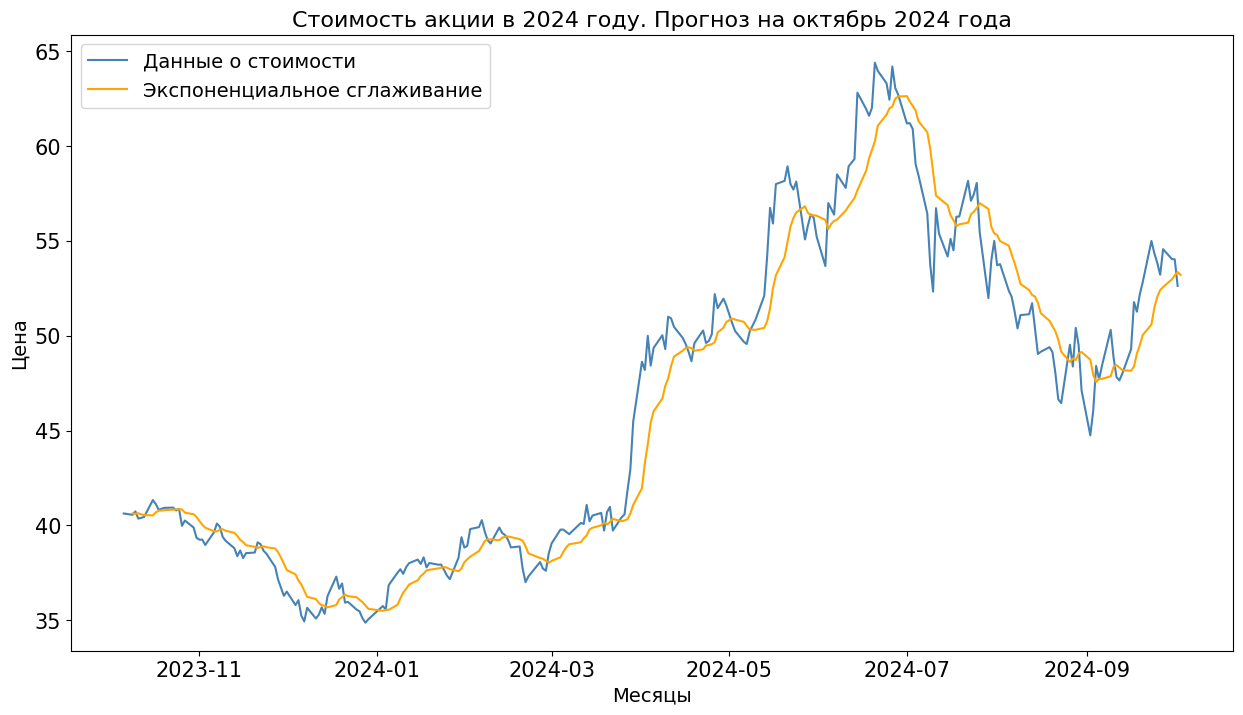

In [120]:
# зададим размер
plt.figure(figsize = (15,8))
 
# выведем данные о рождаемости и кривую экспоненциального сглаживания
plt.plot(df_aflt_years['CLOSE'], label = 'Данные о стоимости', color = 'steelblue')
plt.plot(df_aflt_years['Exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.ylabel('Цена', fontsize = 14)
plt.xlabel('Месяцы', fontsize = 14)
plt.title('Стоимость акции в 2024 году. Прогноз на октябрь 2024 года', fontsize = 16)
 
plt.show()

Модель ARMA

Модель ARMA состоит из двух компонентов.

компоненты модели ARMA: авторегрессия и скользящее среднее
Авторегрессия (autoregressive model, AR) — это регрессия ряда на собственные значения в прошлом. Другими словами, наши признаки в модели обычной регрессии мы заменяем значениями той же переменной, но за предыдущие периоды.

Модель ARMA с параметрами (или как еще говорят порядками, orders) p и q или ARMA(p, q) позволяет описать любой стационарный временной ряд.

ARMA предполагает, что в данных отсутствует тренд и сезонность (данные стационарны). Если данные нестационарны, нужно использовать более сложные версии этих моделей:

ARIMA, здесь добавляется компонент Integrated (I), который отвечает за удаление тренда (сам процесс называется дифференцированием); и
SARIMA, эта модель учитывает сезонность (Seasonality, S)
SARIMAX включает еще и внешние или экзогенные факторы (eXogenous factors, отсюда и буква X в названии), которые напрямую не учитываются моделью, но влияют на нее.
Параметров у модели SARIMAX больше. Их полная версия выглядит как SARIMAX(p, d, q) x (P, D, Q, s). В данном случае, помимо известных параметров p и q, у нас появляется параметр d, отвечающий за тренд, а также набор параметров (P, D, Q, s), отвечающих за сезонность.

В первую очередь нужно разбить данные на обучающую и тестовую выборки. Как мы помним, у нас есть данные с октября 2013 года по октябрь 2024 года.

In [121]:
# загружаем данные
# сразу превратим дату в индекс и преобразуем ее в объект datetime
df_aflt_sarima = pd.read_csv('AFLT_final.csv', index_col = 'TRADEDATE', parse_dates = True)
df_aflt_sarima.head(3)

,CLOSE
TRADEDATE,
2013-10-31,57.400
2013-11-01,57.380
2013-11-05,56.850


In [122]:
df_aflt_sarima.isna().sum()

CLOSE    18
dtype: int64

In [123]:
# заменим прпуски медианным значением
df_aflt_sarima=df_aflt_sarima.fillna(df_aflt_sarima['CLOSE'].median())

In [124]:
df_aflt_sarima.isna().sum()

CLOSE    0
dtype: int64

In [125]:
# обучающая выборка будет включать данные до сентября 2023 года включительно
train_df = df_aflt_sarima[:'2023-09']
 
# тестовая выборка начнется с октября 2024 года (по сути, один год)
test_df = df_aflt_sarima['2023-10':]
train_df.shape, test_df.shape

((2498, 1), (259, 1))

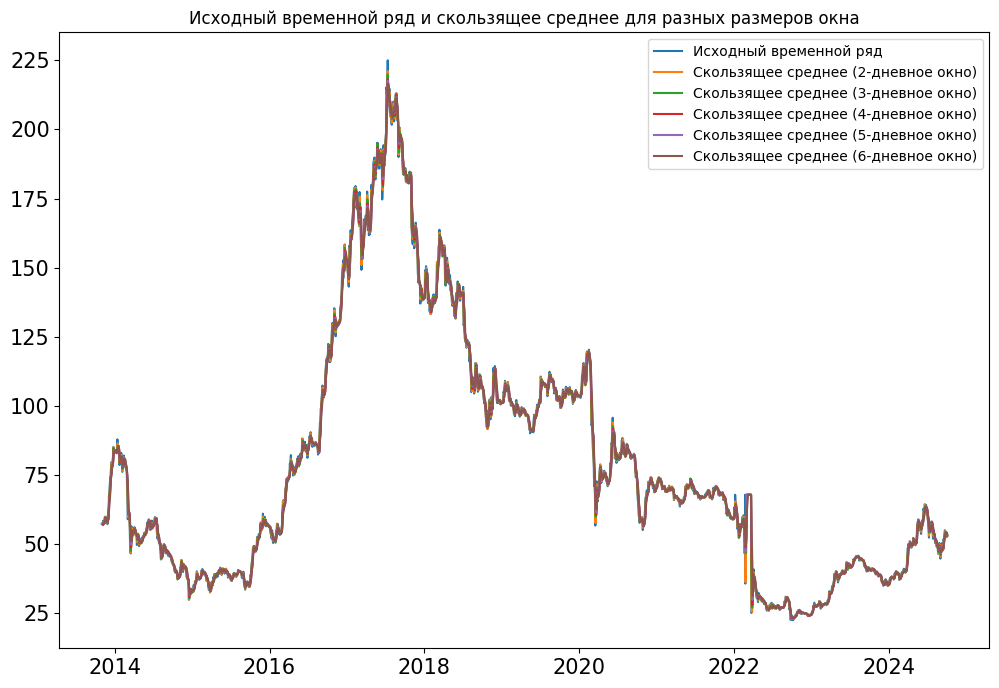

In [126]:
# Размеры окна для скользящего среднего
window_sizes = [2, 3, 4, 5, 6]

# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(df_aflt_sarima['CLOSE'], label='Исходный временной ряд')

for window_size in window_sizes:
    ma = df_aflt_sarima['CLOSE'].rolling(window=window_size).mean()
    plt.plot(ma, label=f'Скользящее среднее ({window_size}-дневное окно)')

plt.legend()
plt.title('Исходный временной ряд и скользящее среднее для разных размеров окна')
plt.show()

Вывод: Чем меньше окно сдвига MA, тем больше модель реагирует на выборсы. Выберем ширину окна равной 6 (начиная с этого значения скользящее среднее перестает реагировать на выбросы, но при этом в наименьшей степени отклоняется от значений исходного ряда).

In [127]:
# визуализируем исходный ряд и ряд построенный с помощью скользящего среднего с выбранным значением окна
fig = go.Figure()
train_df = df_aflt_sarima.iloc[:-3]
train_df = train_df.rolling(window=6).mean()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df.CLOSE, name="MA=6"))
train_df = df_aflt_sarima.iloc[:-3]
fig.add_trace(go.Scatter(x=train_df.index, y=train_df.CLOSE, name="source"))
fig.show()

С помощью теста Дики-Фуллера оцениваем стационарность временного ряда и принимаем решение о выборе модели ARMA/ARIMA.

In [128]:
test = adfuller(train_df.CLOSE)
print("adf: ", test[0])
print("p-value: ", test[1])
print("Critical values: ", test[4])
if test[0] > test[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -1.2589086837144392
p-value:  0.6477558352038769
Critical values:  {'1%': -3.4327449698511328, '5%': -2.8625981246154177, '10%': -2.567333273987658}
ряд нестационарен


Так как ряд нестационарен будем использовать модель ARIMA.
Определим количество дифференцирований, необходимых для сведения ряда к стационарному (параметр d для модели ARIMA).

In [129]:
# Определим количество дифференцирований, необходимых для сведения ряда к стационарному
# (параметр d для модели ARIMA)

d = 0
train_df = df_aflt_sarima.iloc[:-3]
for i in range (1,10):
    train_diff = train_df.diff().dropna()
    test = adfuller(train_diff.CLOSE)
    if test[0] > test[4]["5%"]:
        d += 1
    train_df = train_diff
print("d = ", d + 1)

d =  1


In [130]:
# Проверим
test2 = adfuller(train_df["CLOSE"].diff().dropna())
print("adf: ", test2[0])
print("p-value: ", test2[1])
print("Critical values: ", test2[4])
if test2[0] > test2[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -44.37396327719419
p-value:  0.0
Critical values:  {'1%': -3.432760863154644, '5%': -2.8626051436155726, '10%': -2.5673370109106695}
ряд стационарен


Параметры p и q выбераем по коррелограммам ACF и PACF.

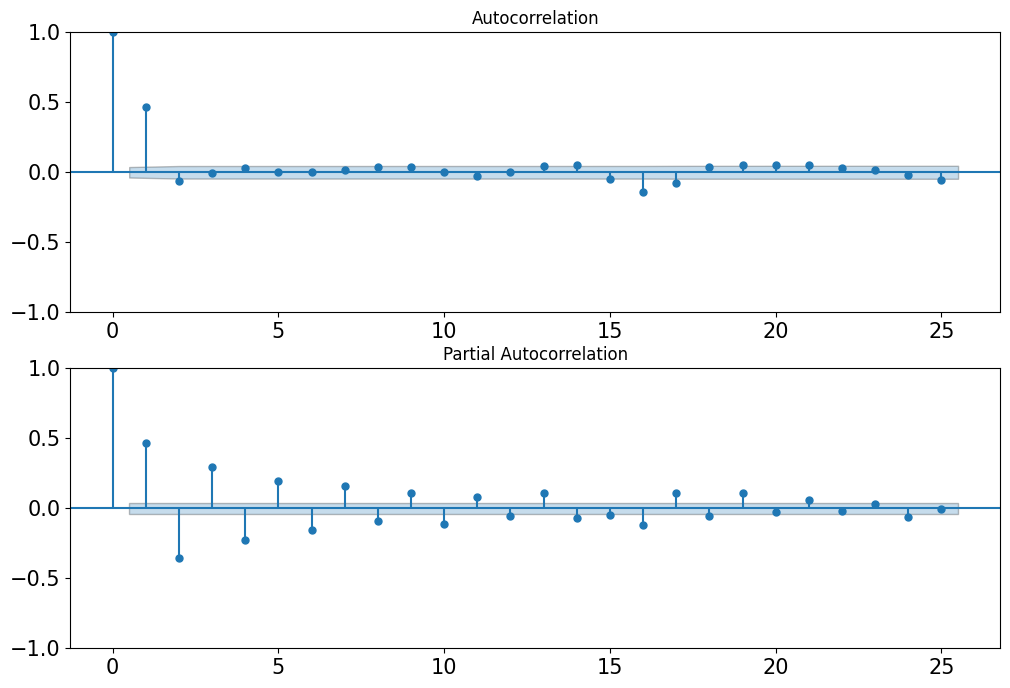

In [131]:
train_diff = df_aflt_sarima.iloc[:-3].diff(periods=2).dropna() 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_diff, lags=25, ax=ax2)

После изучения коррелограммы ACF можно увидеть, что q = 1, а по коррелограмме PACF можно сделать вывод, что p = 1, а  т.к. после лага 1 значения функций становятся ниже уровня значимости.

In [135]:
# Построим модель ARIMA со следующими параметрами: p = 1, d = 1, q = 1 
arima_model = ARIMA(train_df.CLOSE.dropna(), order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  CLOSE   No. Observations:                 2745
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16763.537
Date:                Wed, 09 Oct 2024   AIC                          33533.075
Time:                        22:48:39   BIC                          33550.826
Sample:                             0   HQIC                         33539.489
                               - 2745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8655      0.003   -296.921      0.000      -0.871      -0.860
ma.L1         -0.9998      0.069    -14.405      0.000      -1.136      -0.864
sigma2       1.18e+04    828.672     14.245      0.0

Подберем наилучшие параметры с помощью пакета pmdarima

In [138]:
smodel = pm.auto_arima(
    train_df.CLOSE.dropna(),
    start_p=1,
    start_q=1,
    d=1,
    max_p=6,
    max_q=6,
    seasonal=False,
    test="adf",
    n_jobs=-1,
    error_action="ignore",
    trace= True,
)
print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=40930.825, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=36846.213, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=40928.826, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=34009.639, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=31798.950, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=30031.109, Time=0.37 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=28604.270, Time=0.59 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=27387.484, Time=0.62 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=25458.392, Time=4.86 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.37 sec
 ARIMA(6,1,1)(0,0,0)[0]             : AIC=25121.1

Осуществим подбор параметров с помощью auto_arima

In [141]:
# настроим поиск параметров на обучающей выборке
parameter_search = auto_arima(train_df, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)           #

# выведем результат
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=39121.876, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=34536.421, Time=1.99 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=39119.882, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=35244.778, Time=0.20 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=34103.940, Time=7.34 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.71 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.88 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=37945.021, Time=7.42 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=31502.935, Time=9.12 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=31837.853, Time=2.73 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.79 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.86 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : 

In [142]:
# Построим модель с оптимальными параметрами
arima_model = ARIMA(train_df.CLOSE.dropna(), order=(3, 0, 0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  CLOSE   No. Observations:                 2745
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14437.116
Date:                Wed, 09 Oct 2024   AIC                          28884.232
Time:                        22:57:44   BIC                          28913.820
Sample:                             0   HQIC                         28894.923
                               - 2745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.160      0.012      0.990      -0.311       0.315
ar.L1         -2.1122      0.003   -642.331      0.000      -2.119      -2.106
ar.L2         -1.9011      0.005   -354.352      0.0

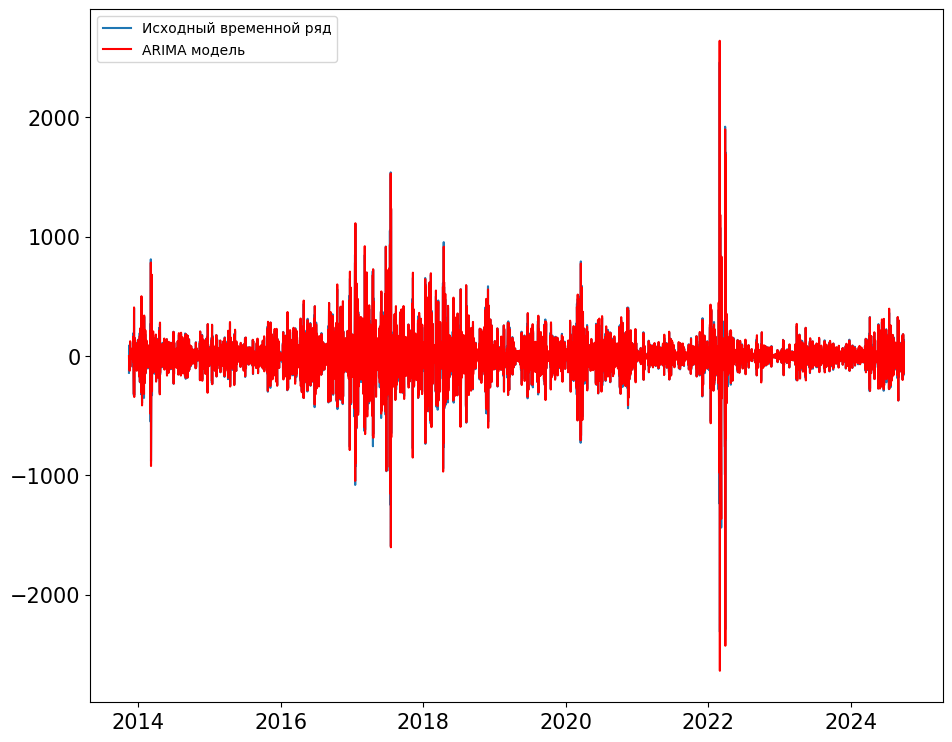

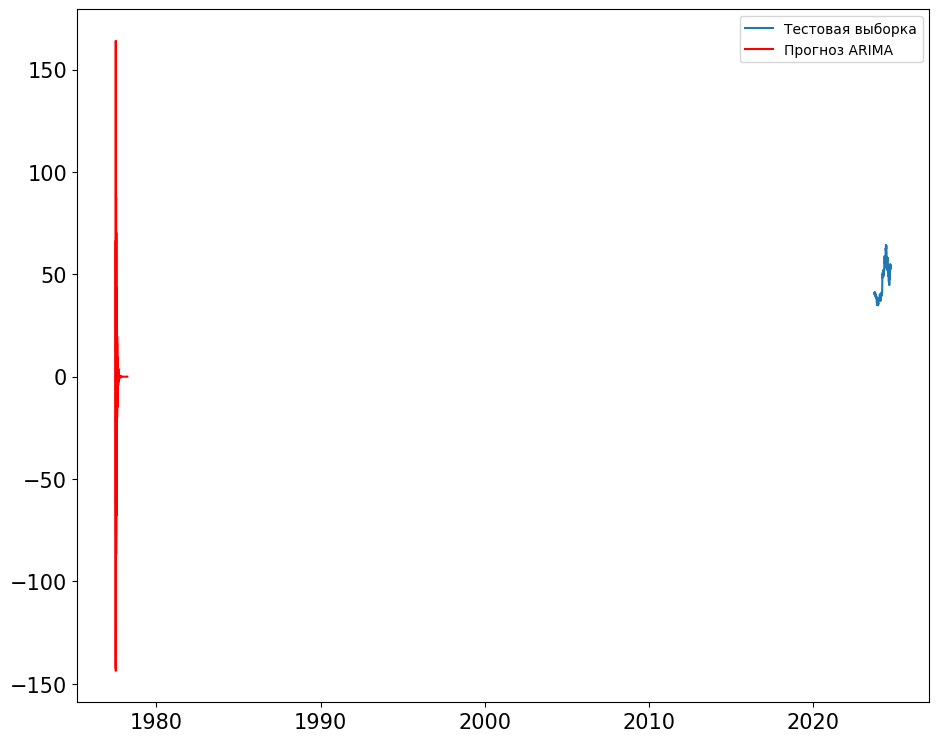

In [143]:
# Построим модель ARIMA с найденными параметрами
arima_model = ARIMA(train_df["CLOSE"], order=(6, 1, 1))
arima_fit = arima_model.fit()

# Визуализация и сравнение с исходным временным рядом
plt.plot(train_df["CLOSE"], label="Исходный временной ряд")
plt.plot(arima_fit.fittedvalues, color='red', label="ARIMA модель")
plt.legend()
plt.show()

# Прогноз для тестовой выборки
forecast = arima_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) - 1, typ='levels')

# Оценка качества прогноза
plt.plot(test_df['CLOSE'], label="Тестовая выборка")
plt.plot(forecast, color='red', label="Прогноз ARIMA")
plt.legend()
plt.show()

Вывод: подбор оптимальных коэффицентов процесс трудоемкий, кроме того данные модели имеют большой набор настроек, которые позволяют проводить прогнозирование. В данном эксперименте результаты получены неоднозначные.

[Оглавление ⬆️](#item-zero)

### 4.1. Прогнозирование индекса московской биржи, построение моделей <a id="item-four-one"></a>

Прогнозирование индекса московской биржи

In [31]:
# загружаем данные в dataframe, воспльзуемся последним
df = pd.read_csv("data_moex.csv", sep=",")
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-10-08,2788.12,2799.16,2774.84,2785.62,NaN
1,2024-10-07,2808.01,2816.88,2779.38,2794.77,NaN
2,2024-10-04,2799.95,2818.05,2789.93,2802.23,NaN
3,2024-10-03,2767.51,2790.89,2740.00,2782.40,NaN
4,2024-10-02,2825.72,2838.76,2767.93,2771.87,NaN


Text(0.5, 1.0, 'Stock Price of MOEX over the Years')

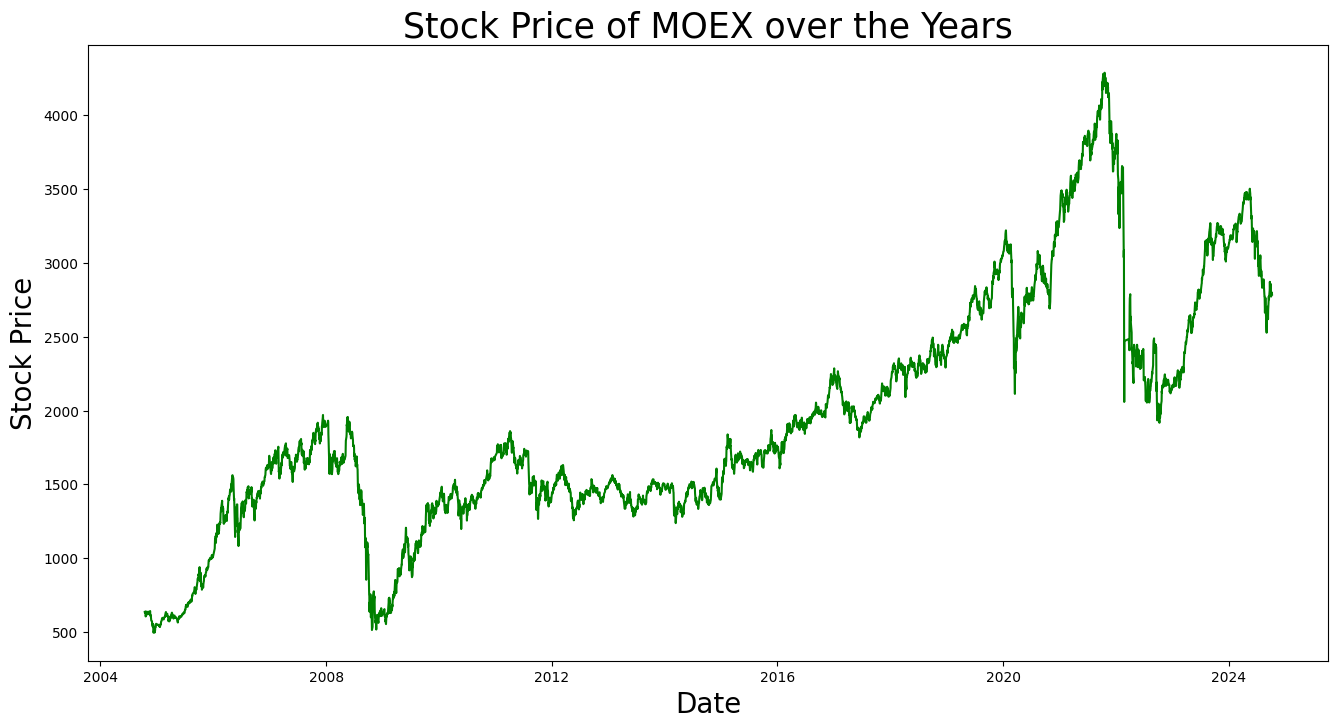

In [32]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of MOEX over the Years',size=25)

[Оглавление ⬆️](#item-zero)

### 4.1.1. Модель прогнозирования скользящего среднего <a id="item-four-one-one"></a>

Модель прогнозирования скользящего среднего (MA-модель) — это метод моделирования временных рядов, который использует прошлые значения ошибок — разницу между фактическими значениями ряда и его прогнозируемыми значениями, для прогнозирования будущих значений.

Метод скользящего среднего заключается в вычислении среднего значения ряда за определённый период, а затем использовании этого значения для прогнозирования будущих значений.

Основная идея заключается в том, чтобы вычислить среднее значение последовательных подмножеств данных, исходя из определённого окна или периода времени. Этот метод позволяет выделить общие тенденции, убрать случайные шумы и предсказать будущие значения.

Пример использования MA-модели — прогнозирование количества пользователей веб-сайта. Например, если предыдущие прогнозы ошиблись на определённый процент, можно использовать эту информацию в модели прогнозирования для улучшения точности прогноза количества пользователей.

In [33]:
def moving_avg_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    preds = []
    for i in range(0,valid_set.shape[0]):
        a = train_set['Close'][len(train_set)-valid_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid_set.shape[0])
        preds.append(b)
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    # рассчитаем MSE
    mse = mean_squared_error(valid_set, preds)
    print('MSE value on validation set:',mse)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Moving Averages',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    


-----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
-----------------------------------------------------------
Shape of Training Set (3728, 1)
Shape of Validation Set (1242, 1)
RMSE value on validation set: 511.03980542356044
MSE value on validation set: 261161.6827273505
-----------------------------------------------------------
-----------------------------------------------------------


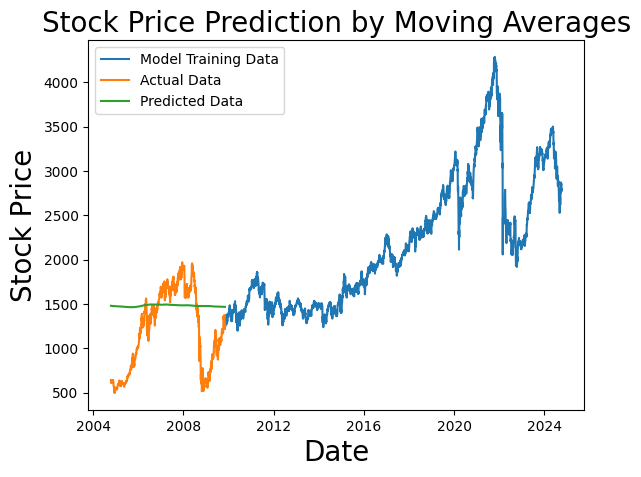

In [34]:
moving_avg_prediction(df)

[Оглавление ⬆️](#item-zero)

#### 4.1.2. LinearRegression() = Baseline model <a id="item-four-one-two"></a>

***В рамках данного проекта рассмотрим линейную модель LinearRegression():***

1. **LinearRegression()** - это модель, которая предполагает линейную зависимость между независимыми переменными и целевой переменной. Алгоритм LinearRegression() обучается на данных и строит линейную комбинацию весов (коэффициентов) для каждой независимой переменной, которая затем используется для предсказания целевой переменной.

Процесс обучения алгоритма LinearRegression() включает в себя вычисление наилучших весов, минимизирующих сумму квадратов ошибок (RSS) между предсказанными и истинными значениями целевой переменной. Это достигается с помощью метода наименьших квадратов (OLS - Ordinary Least Squares), который минимизирует среднеквадратическую ошибку между предсказанными и истинными значениями.

**Baseline** модель - это простая модель, которая служит в качестве отправной точки для сравнения с более сложными моделями. **Baseline** модель обычно используется в машинном обучении и статистике как простое и быстрое решение задачи, чтобы понять, насколько хорошо работают более сложные модели по сравнению с этим простым подходом.

**Baseline** модель может быть очень примитивной, например, предсказывать среднее значение целевой переменной для каждого входного примера. Это позволяет установить минимальный уровень производительности, который должны превзойти более сложные модели.

Использование **baseline** модели помогает оценить эффективность и значимость более сложных моделей, а также может дать представление о том, насколько хорошо данные различаются и могут быть предсказаны. В дальнейшем, по сравнению с **baseline** моделью, мы можем определить, насколько улучшается производительность модели после внесения улучшений или изменений.

In [39]:
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    # рассчитаем MSE
    mse = mean_squared_error(valid_set, preds)
    print('MSE value on validation set:',mse)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Linear Regression',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    # cохраняем модель в файл
    dump(model, "LinearRegression.joblib")



-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (3728, 1)
Shape of Validation Set (1242, 1)
RMSE value on validation set: 672.6300762829734
MSE value on validation set: 398596.0335852884
-----------------------------------------------------------
-----------------------------------------------------------


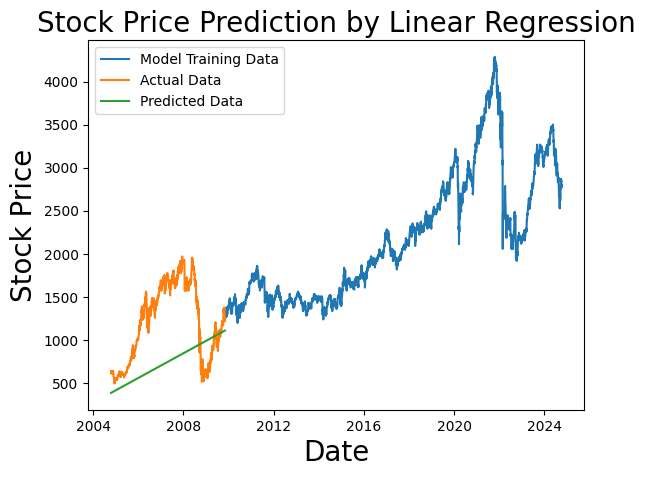

In [40]:
linear_regression_prediction(df)

[Оглавление ⬆️](#item-zero)

#### 4.1.3. K-Nearest Neighbors model <a id="item-four-one-three"></a>

К-ближайших соседей (K-Nearest Neighbors или просто KNN) — алгоритм классификации и регрессии, основанный на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу.

Принцип работы KNN
Алгоритм строится следующим образом:

1) сначала вычисляется расстояние между тестовым и всеми обучающими образцами;

2) далее из них выбирается k-ближайших образцов (соседей), где число k задаётся заранее;

3) итоговым прогнозом среди выбранных k-ближайших образцов будет мода в случае классификации и среднее арифметическое в случае регрессии;

4) предыдущие шаги повторяются для всех тестовых образцов.

In [41]:
def k_nearest_neighbours_predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-------------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    # рассчитаем MSE
    mse = mean_squared_error(valid_set, preds)
    print('MSE value on validation set:',mse)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    # cохраняем модель в файл
    dump(model, "GridSearchCV.joblib")


-------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-------------------------------------------------------------------
Shape of Training Set (3728, 1)
Shape of Validation Set (1242, 1)
RMSE value on validation set: 1246.0487374106995
MSE value on validation set: 1552637.4560027982
-----------------------------------------------------------
-----------------------------------------------------------


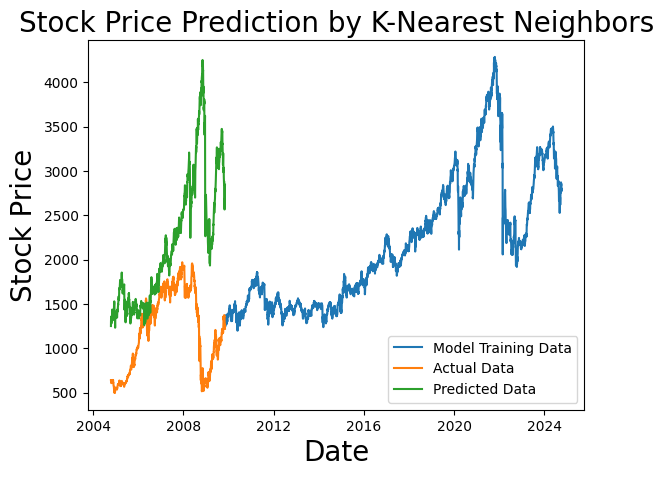

In [44]:
k_nearest_neighbours_predict(df)

[Оглавление ⬆️](#item-zero)

#### 4.1.4.  ARIMA model <a id="item-four-one-four"></a>

Модель ARIMA для прогнозирования временных рядов
ARIMA расшифровывается как авторегрессионная интегрированная модель скользящего среднего и определяется тремя параметрами порядка: (p, d, q).

AR(p) Авторегрессия – регрессионная модель, которая использует зависимую связь между текущим наблюдением и наблюдениями за предыдущий период.Авторегрессионный компонент (AR (p)) относится к использованию прошлых значений в уравнении регрессии для временного ряда.
I(d) Интеграция — использует дифференцирование наблюдений (вычитание наблюдения из наблюдения на предыдущем временном шаге), чтобы сделать временной ряд стационарным. Дифференцирование предполагает вычитание текущих значений ряда из его предыдущих значений d раз.
MA(q) — скользящее среднее — модель, которая использует зависимость между наблюдением и остаточной ошибкой модели скользящего среднего, применяемой к запаздывающим наблюдениям. Компонент скользящего среднего показывает ошибку модели как комбинацию предыдущих ошибок. Порядок q представляет собой количество терминов, которые необходимо включить в модель.
Типы модели ARIMA

ARIMA: несезонные авторегрессионные интегрированные скользящие средние
SARIMA:Сезонная ARIMA
SARIMAX:сезонная ARIMA с экзогенными переменными
Автоматическая пирамида-ARIMA

Функция ‘auto_arima’ из библиотеки ‘pmdarima’ помогает определить наиболее оптимальные параметры для модели ARIMA и возвращает подобранную модель ARIMA.

In [45]:
def auto_arima_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    data = df_new.sort_index(ascending=True, axis=0)
    train_set=data[:ceil(shape*0.75)]
    valid_set=data[ceil(shape*0.75):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    training = train_set['Close']
    validation = valid_set['Close']
    model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=ceil(floor(df.shape[0]*0.75)))
    forecast = pd.DataFrame(forecast,index = valid_set.index,columns=['Prediction'])
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-np.array(forecast['Prediction'])),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    plt.plot(train_set['Close'])
    plt.plot(valid_set['Close'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Auto ARIMA',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    # cохраняем модель в файл
    dump(model, "Auto_arima.joblib")
    


----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set (3728, 1)
Shape of Validation Set (1242, 1)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=36724.008, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=35587.585, Time=0.94 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=36723.191, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=35177.310, Time=2.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=35175.961, Time=1.76 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=35585.614, Time=0.63 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=11.04

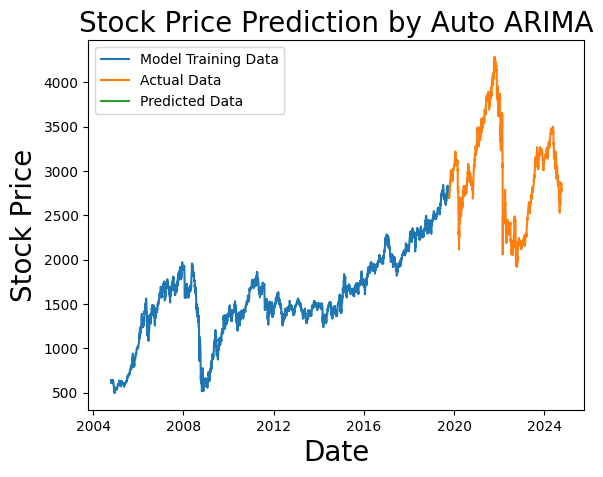

In [52]:
auto_arima_prediction(df)

[Оглавление ⬆️](#item-zero)

#### 4.1.5.  Facebook Prophet model <a id="item-four-one-five"></a>

Модель Facebook Prophet
Исследовательская группа Facebook разработала более простую реализацию прогнозирования временных рядов с помощью своей новой библиотеки под названием Prophet (Предсказатель). Редко можно встретить аналитика, способного давать качественные прогнозные данные. Это одна из причин, по которой исследовательская группа Facebook придумала легко доступный способ использования передовых концепций для прогнозирования временных рядов.

Мы, пользователи Python, можем легко познакомиться с этой библиотекой, потому что она использует API, похожий на Scikit-Learn. Основная цель команды Prophet – дать возможность экспертам и неспециалистам делать качественные прогнозы, удовлетворяющие существующие запросы.

In [47]:
def fb_prophet_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.reset_index(inplace=True)
    df_new['Date'] = pd.to_datetime(df_new.Date,format='%Y-%m-%d')
    df_new.index = df_new['Date']
    df_new.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY FB PROPHET-----------')
    print('-------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    model = Prophet()
    model.fit(train_set)
    close_prices = model.make_future_dataframe(periods=len(valid_set))
    forecast = model.predict(close_prices)
    forecast_valid = forecast['yhat'][ceil(shape*0.75):]
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['y'])-np.array(forecast_valid)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = forecast_valid.values
    plt.plot(train_set['y'])
    plt.plot(valid_set[['y', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by FB Prophet',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    # cохраняем модель в файл
    dump(model, "Prophet.joblib")


-------------------------------------------------------
-----------STOCK PRICE PREDICTION BY FB PROPHET-----------
-------------------------------------------------------
Shape of Training Set (3728, 2)
Shape of Validation Set (1242, 2)


21:41:20 - cmdstanpy - INFO - Chain [1] start processing
21:41:21 - cmdstanpy - INFO - Chain [1] done processing


RMSE value on validation set: 1332.3697465148593
-----------------------------------------------------------
-----------------------------------------------------------


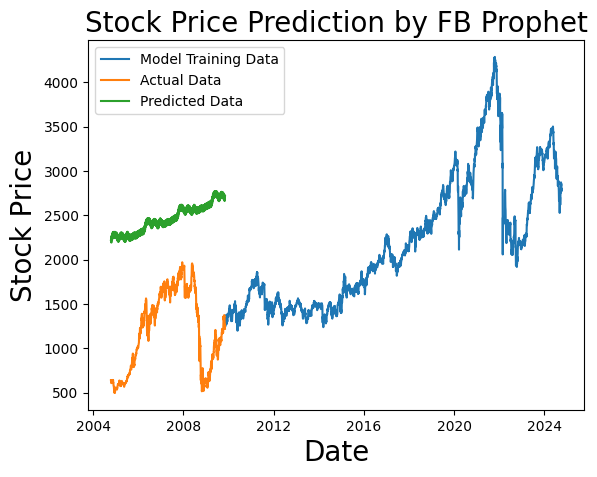

In [51]:
fb_prophet_prediction(df)

[Оглавление ⬆️](#item-zero)

#### 4.1.6.  Long Short Term Memory (LSTM) model <a id="item-four-one-six"></a>

Рекуррентная нейронная сеть глубокого обучения (Long Short Term Memory (LSTM)) имеет способность улавливать закономерности в данных временных рядов и вследствие этого может использоваться для прогнозирования будущего тренда данных. Традиционные нейронные сети не обладают таким свойством. Структура LSTM похожа на цепочку, которая вместо одного слоя нейронной сети содержит четыре. Эти слои взаимодействуют особенным образом.

In [50]:
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    # df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    # cохраняем модель в файл
    dump(model, "Sequential.joblib")


-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (3728, 1)
Shape of Validation Set (1242, 1)
3688/3688 - 62s - 17ms/step - loss: 0.0011
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
RMSE value on validation set: 54.746731633923396
-----------------------------------------------------------
-----------------------------------------------------------


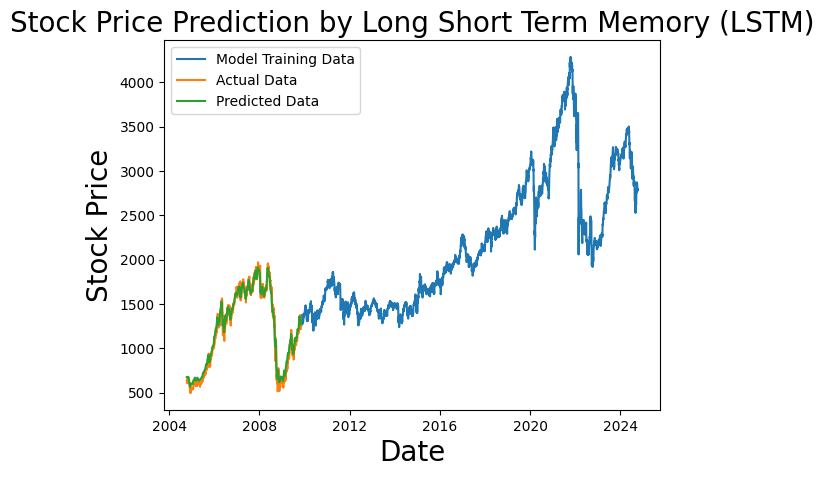

In [49]:
lstm_prediction(df)

[Оглавление ⬆️](#item-zero)

#### 4.1.7.  Работа с наилучшими моделями с данными акции Аэрофлот <a id="item-four-one-seven"></a>

Предлагается взять данные за год

In [165]:
# c учетом неопределенности, а также фундаментального анализа фондового рынка,
# предлагается рассмотреть период года, в связи с чем сделаем срез за определенный период, 
# например, с 6 октября 2023 года по 5 октября 2024 года.
# загружаем данные
# сразу превратим дату в индекс и преобразуем ее в объект datetime
df_aflt = pd.read_csv('AFLT.csv', index_col = 'TRADEDATE', parse_dates = True)
df_aflt.head(3)
df_1 = df_aflt['2023-10-06':'2024-10-05']


In [166]:
def lstm_prediction(df_1):
    shape=df_1.shape[0]
    df_new=df_1[['CLOSE']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('-----------------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('-----------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    plt.plot(train['CLOSE'])
    plt.plot(valid[['CLOSE','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
-----------------------------------------------------------------------------
Shape of Training Set (190, 1)
Shape of Validation Set (63, 1)
150/150 - 5s - 32ms/step - loss: 0.0165
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step
RMSE value on validation set: 6.739415053930945
-----------------------------------------------------------
-----------------------------------------------------------


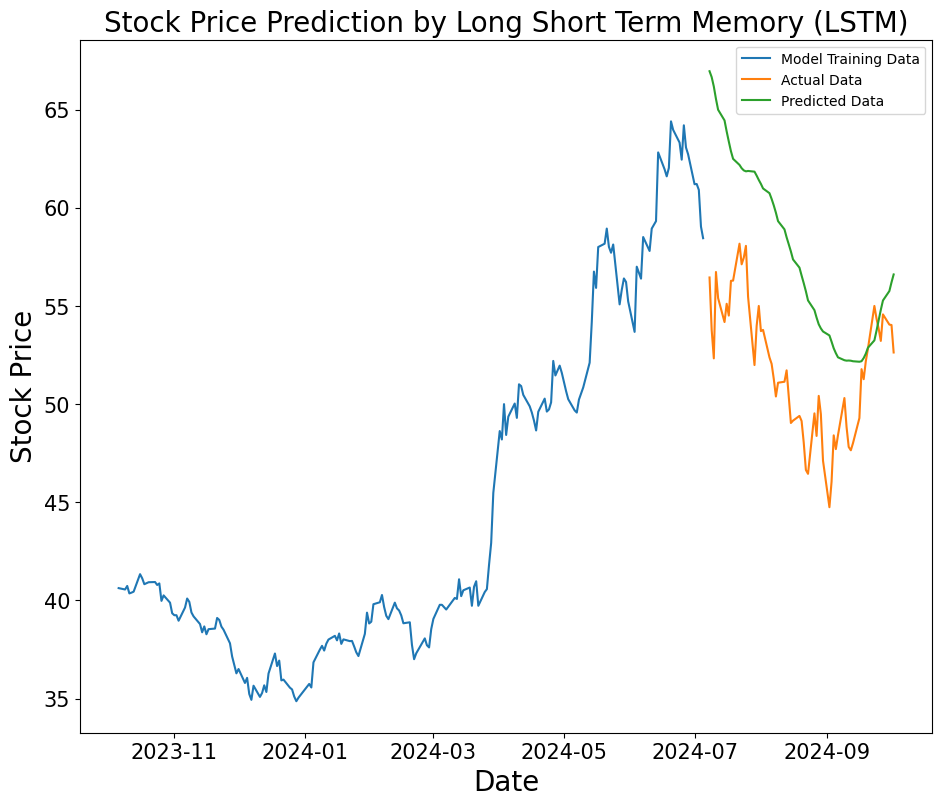

In [167]:
lstm_prediction(df_1)

In [178]:
def auto_arima_prediction(df_1):
    shape=df_1.shape[0]
    df_new=df_1[['CLOSE']]
    data = df_new.sort_index(ascending=True, axis=0)
    train_set=data[:ceil(shape*0.75)]
    valid_set=data[ceil(shape*0.75):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    training = train_set['CLOSE']
    validation = valid_set['CLOSE']
    model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=4,start_P=0, seasonal=False,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=ceil(floor(df.shape[0]*0.75)))
    forecast = pd.DataFrame(forecast,index = valid_set.index,columns=['Prediction'])
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['CLOSE'])-np.array(forecast['Prediction'])),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    plt.plot(train_set['CLOSE'])
    plt.plot(valid_set['CLOSE'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Auto ARIMA',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set (190, 1)
Shape of Validation Set (63, 1)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=502.038, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=499.123, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=500.915, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=500.958, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=499.201, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.172 seconds
RMSE value on validation set: nan
-----------------------------------------------------------
-----------------------------------------------------------


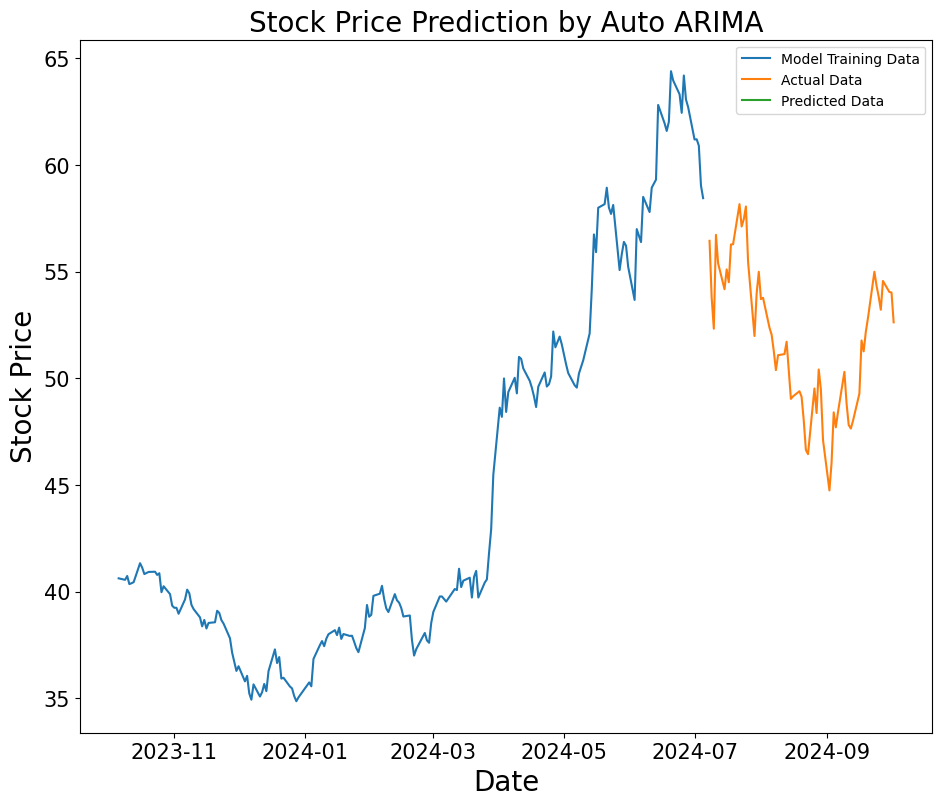

In [179]:
auto_arima_prediction(df_1)

In [172]:
def k_nearest_neighbours_predict(df_1):
    shape=df_1.shape[0]
    df_new=df_1[['CLOSE']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-------------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['TRADEDATE'].map(dt.datetime.toordinal)
    y_train = train[['CLOSE']]
    x_valid = valid['TRADEDATE'].map(dt.datetime.toordinal)
    y_valid = valid[['CLOSE']]
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    # рассчитаем MSE
    mse = mean_squared_error(valid_set, preds)
    print('MSE value on validation set:',mse)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['CLOSE'])
    plt.plot(valid_set[['CLOSE', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


-------------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-------------------------------------------------------------------
Shape of Training Set (190, 1)
Shape of Validation Set (63, 1)
RMSE value on validation set: 11.950742405709322
MSE value on validation set: 142.82024404761904
-----------------------------------------------------------
-----------------------------------------------------------


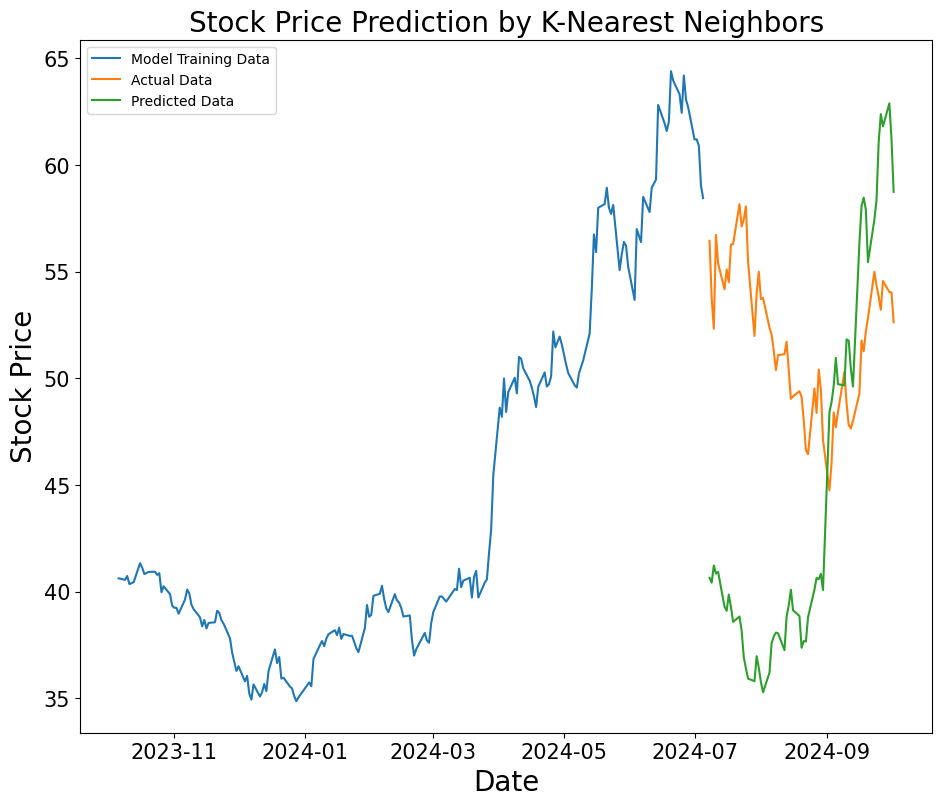

In [173]:
k_nearest_neighbours_predict(df_1)

In [174]:
def linear_regression_prediction(df_1):
    shape=df_1.shape[0]
    df_new=df_1[['CLOSE']]
    #df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['TRADEDATE'].map(dt.datetime.toordinal)
    y_train = train[['CLOSE']]
    x_valid = valid['TRADEDATE'].map(dt.datetime.toordinal)
    y_valid = valid[['CLOSE']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['CLOSE'])-preds),2)))
    print('RMSE value on validation set:',rms)
    # рассчитаем MSE
    mse = mean_squared_error(valid_set, preds)
    print('MSE value on validation set:',mse)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['CLOSE'])
    plt.plot(valid_set[['CLOSE', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Linear Regression',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])


-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (190, 1)
Shape of Validation Set (63, 1)
RMSE value on validation set: 10.086586166833188
MSE value on validation set: 108.50092327686575
-----------------------------------------------------------
-----------------------------------------------------------


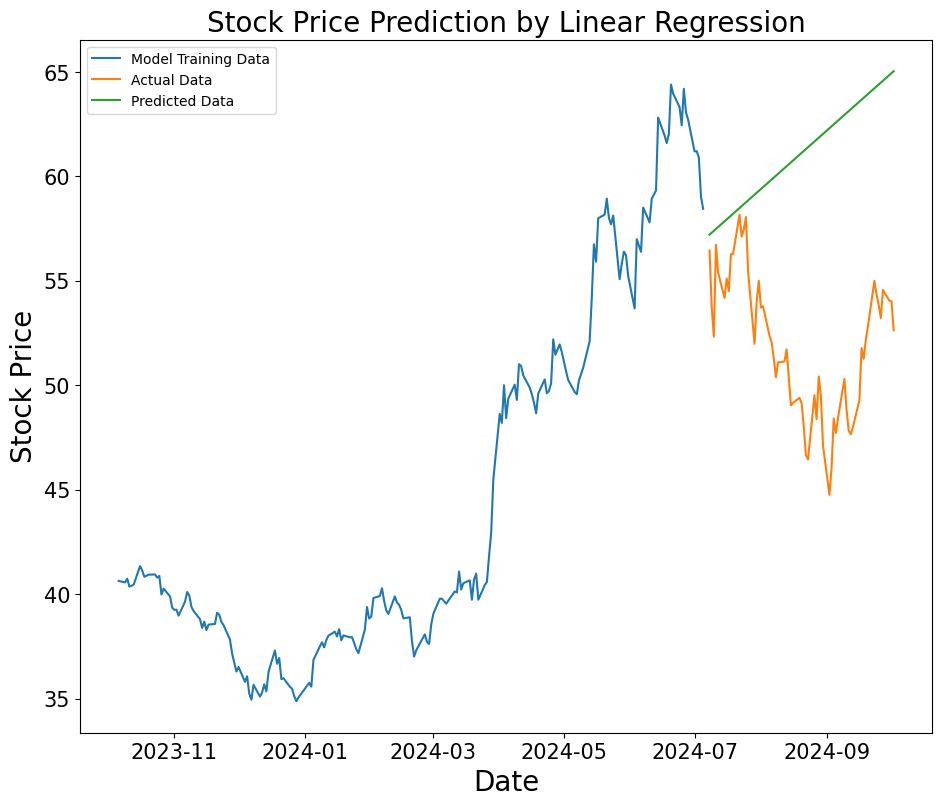

In [175]:
linear_regression_prediction(df_1)

[Оглавление ⬆️](#item-zero)

## 5. Выводы<a id="item-five"></a>

**Что сделано:**

1. Честно говоря, только половина времени ушла на выбор темы для данного проекта, изначально хотел погрузится в обработку данных по недвижимости, осуществить прогнозирование стоимости жилья;
2. Написан код для парсинга данных фондового рынка;
3. Рассмотрены различные источники, откуда можно парсить данные;
4. Возможно из-за более менее структурированных данных невозможно было показать все навыки и умения, которые были рассмотрены в курсе обучения.

**Что не получилось:**

1. Ввиду множества настроек, так и не получилось добится адкватных результатов при работе с авторегрессионной интегрированной моделью скользящего среднего;
2. Ничего не сделал в части продакшин и деплой модели, хотел написать телеграм-бот , но уже все сроки просрочены (вернусь позже).
3. Понятие скользящие средние (ЕМА20, 50, 100 и т.д.) интересный момент, не успел рассмотреть.
4. Неотемлемой частью является учитывание новостного фона, что также необходимо реализовать в проекте при прогнозировании стоимости акций.

**Общий вывод:**

1. Из представленных моделей прогнозирования лучшие показатели MSE удалось достигнуть с помощью модели Long Short Term Memory (LSTM), но в реальной жизни я бы хотел разобраться с GPT (LAMA, LLLM), мне кажется за этим будущее. В ходе предобработки и анализа данных, можно сделать вывод о том, что статистические сведения фондового рынка нельзя рассматривать через призму сезонности и тренда, на данные показатели очень сильно влияют новостной фон (который необходимо тоже учитывать, и также разработать модель прогноза), повсеместное применение роботов покупки и продажи. Кроме того, необходимо учитывать акции различных эшелонов, в том числе так называемых "голубых фишек" , у которых волотильность цен очень сильно различается.
Возможно, модели будут лучше работать на данных по облигациям, т.к. в этих данных волотильность на порядок ниже.

[Оглавление ⬆️](#item-zero)